# About this Notebook

This is a Python notebook. This is the notebook you'll use to run and create the analysis code on pickle data sets. Pickle files are created and premanufactured from ROOT files from MicroBooNE LAr experiment.

You should have access to: example_neutrino.ipynb, neutrino_function.py, data folder. You are free to modify neutrino_function.py or create your own plotting functions.

**IMPORTANT:** It is strongly recommended that only **one** student of a lab pair should edit this notebook and the files contained within the server directories. This is because both students cannot see the same live edit of the notebook or files at the same time, and it is easy to accidently overwrite each other.

Code that is commented out with two hashtags should be uncommented when in use.

# All imports

The basic libraries, you may import more if there are present on the server's environment. If you dont have these packages installed on your local machine, you can use **pip install X** or **pip3 install X** to start using them.

In [1]:
import numpy as np
import uproot3
import pickle

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import Neutrino_functions

from math import *
import scipy as sci

# MACHINE LEARNING IMPORTS
import sklearn
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

/Users/harrytabb/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
pd.__version__

'1.5.3'

# Opening the MC and data frames

In [3]:
# MC
MC_file = './data/MC_EXT_flattened.pkl'

# Data
data_file = './data/data_flattened.pkl'

po_file = '/Users/harrytabb/Documents/lab_2/data/oscillated_data.pkl'

# Open file as pandas dataframe
MC_EXT = pd.read_pickle(MC_file)
data = pd.read_pickle(data_file)
po_data = pd.read_pickle(po_file)

# removing 'Subevent' from data
MC_EXT = MC_EXT.drop('Subevent', axis = 1)
data = data.drop('Subevent', axis = 1)
# po_data = po_data.drop('Subevent', axis = 1)

In [4]:
data

,_closestNuCosmicDist,trk_len_v,trk_distance_v,category,topological_score,trk_sce_end_z_v,trk_sce_end_y_v,trk_sce_end_x_v,trk_score_v,trk_llr_pid_score_v,trk_sce_start_z_v,trk_sce_start_y_v,trk_sce_start_x_v,reco_nu_vtx_sce_x,reco_nu_vtx_sce_y,reco_nu_vtx_sce_z,trk_energy_tot
0,48.170196,230.178085,0.289455,0,0.932121,662.713745,-10.419758,0.564317,1.0,0.981798,443.558472,-71.411057,32.10228,32.137272,-71.675980,443.439148,10000.021584
1,48.170196,19.862617,20.065849,0,0.932121,467.605438,-41.015533,40.286861,0.460725,0.722245,455.0065,-55.723381,36.461731,32.137272,-71.675980,443.439148,10000.021584
3,177.083498,174.338699,0.057629,0,0.588847,978.765259,9.115969,153.437668,0.999995,0.970214,852.828674,-36.029785,42.856102,42.869896,-35.978130,852.848938,0.629191
10,0.067737,264.553223,196.515564,0,0.002079,998.799072,18.552534,225.164139,1.0,0.977688,797.282776,63.213791,63.001648,160.463943,-113.297066,772.441833,10000.778217
11,36.361293,493.096283,0.465464,0,0.983048,865.795166,-56.678547,80.313004,1.0,0.990403,408.639801,96.316406,141.032898,141.039246,96.385994,408.178772,1.296849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389448,95.722545,92.994888,396.635223,0,0.014082,46.944588,116.352737,67.0942,0.99936,0.85618,70.417984,31.287842,92.912865,25.285788,106.608055,454.572327,9999.631083
389449,95.722545,11.709758,166.443726,0,0.014082,465.42984,122.604523,189.047379,0.019354,0.461702,464.63028,112.029297,190.473724,25.285788,106.608055,454.572327,9999.631083
389451,103.401270,182.949554,0.28909,0,0.101421,955.642639,116.216316,115.24794,1.0,0.971342,793.728394,37.36002,99.886131,99.867477,37.655113,793.773193,9999.677782
389453,61.527838,352.968567,0.275442,0,0.979009,1036.627563,82.489006,67.828445,1.0,0.987493,688.785034,80.370071,10.267623,10.359276,80.593437,688.916870,10000.114375


# You can display the dataframe by uncommenting these lines and running the cell

In [5]:
# Uncomment these lines to display the dataframes
pd.set_option('display.max_columns', 100)
# displays top 10 results.
data.head(10)

,_closestNuCosmicDist,trk_len_v,trk_distance_v,category,topological_score,trk_sce_end_z_v,trk_sce_end_y_v,trk_sce_end_x_v,trk_score_v,trk_llr_pid_score_v,trk_sce_start_z_v,trk_sce_start_y_v,trk_sce_start_x_v,reco_nu_vtx_sce_x,reco_nu_vtx_sce_y,reco_nu_vtx_sce_z,trk_energy_tot
0,48.170196,230.178085,0.289455,0,0.932121,662.713745,-10.419758,0.564317,1.0,0.981798,443.558472,-71.411057,32.10228,32.137272,-71.675980,443.439148,10000.021584
1,48.170196,19.862617,20.065849,0,0.932121,467.605438,-41.015533,40.286861,0.460725,0.722245,455.0065,-55.723381,36.461731,32.137272,-71.675980,443.439148,10000.021584
3,177.083498,174.338699,0.057629,0,0.588847,978.765259,9.115969,153.437668,0.999995,0.970214,852.828674,-36.029785,42.856102,42.869896,-35.978130,852.848938,0.629191
10,0.067737,264.553223,196.515564,0,0.002079,998.799072,18.552534,225.164139,1.0,0.977688,797.282776,63.213791,63.001648,160.463943,-113.297066,772.441833,10000.778217
11,36.361293,493.096283,0.465464,0,0.983048,865.795166,-56.678547,80.313004,1.0,0.990403,408.639801,96.316406,141.032898,141.039246,96.385994,408.178772,1.296849
13,127.613429,181.327194,0.272344,0,0.021950,264.979065,92.158607,255.202988,0.999972,0.958479,230.559982,-81.870941,221.46637,221.349503,-81.868439,230.311829,9999.794868
14,127.613429,10.863928,0.334015,0,0.021950,226.903671,-91.896515,218.480057,0.791141,-0.287616,229.998383,-81.993217,221.4086,221.349503,-81.868439,230.311829,9999.794868
16,101.562292,8.869122,265.905823,0,0.036152,110.97657,81.228905,30.3652,0.011572,0.133134,114.274597,86.827835,36.310745,170.431870,59.736755,340.503021,9999.221455
19,181.173178,168.925873,0.349405,0,0.517549,517.184326,67.922836,156.103348,0.999998,0.959285,406.7724,114.33268,40.269585,40.016575,114.483635,406.585693,9999.828041
37,162.177990,47.523987,0.030297,0,0.336266,892.599304,-59.251465,37.77512,0.93185,0.761358,870.96521,-33.337875,71.00219,71.004707,-33.363049,870.948181,0.286233


In [6]:
MC_EXT.head(10)

,_closestNuCosmicDist,trk_len_v,trk_distance_v,category,topological_score,trk_sce_end_z_v,trk_sce_end_y_v,trk_sce_end_x_v,trk_score_v,trk_llr_pid_score_v,trk_sce_start_z_v,trk_sce_start_y_v,trk_sce_start_x_v,reco_nu_vtx_sce_x,reco_nu_vtx_sce_y,reco_nu_vtx_sce_z,trk_energy_tot,weight
0,124.478148,225.284348,1.286398,21,0.994485,510.146088,-19.997118,191.864334,1.0,0.977081,343.433655,35.865448,54.776821,53.900658,36.203041,342.578735,1.164239,0.000002
1,124.478148,7.850903,131.947891,21,0.994485,389.239197,46.669083,183.160797,0.041434,0.486446,382.998871,47.109879,178.486572,53.900658,36.203041,342.578735,1.164239,0.000002
2,141.086923,251.017548,0.025229,5,0.007706,766.055969,-50.159794,172.77446,1.0,0.972468,658.480286,117.427391,20.797407,20.804905,117.408989,658.495789,9999.989363,0.158957
3,10.511966,58.736591,10.511966,4,0.066952,213.629105,117.414757,88.746597,0.929871,0.870984,224.018387,60.914005,78.242538,78.443840,50.530334,223.597870,9999.441230,0.192390
4,10.511966,9.962337,3.888895,4,0.066952,235.423004,46.921162,80.265305,0.372258,0.404711,226.829147,51.903919,80.192444,78.443840,50.530334,223.597870,9999.441230,0.192390
5,147.929810,289.265442,0.152002,5,0.515178,1031.704712,52.0289,83.527153,1.0,0.9848,761.951172,-6.10771,1.388844,1.357146,-6.141214,761.806335,9999.934871,0.986006
6,96.691013,56.727428,27.846855,21,0.998477,1036.508911,-38.234692,19.931959,0.065278,0.902933,992.340698,-65.519211,22.75659,25.337120,-80.776207,969.163696,10000.275867,0.158957
7,96.691013,67.758522,0.264366,21,0.998477,1036.692261,-78.989571,24.593576,0.966078,0.940751,969.034668,-81.002808,25.39159,25.337120,-80.776207,969.163696,10000.275867,0.158957
8,96.691013,25.262609,7.398347,21,0.998477,987.487305,-65.503288,5.5114,0.082593,0.79802,972.884705,-76.234444,20.853903,25.337120,-80.776207,969.163696,10000.275867,0.158957
9,106.679589,73.540779,0.226748,5,0.040650,769.010193,110.767021,45.539276,0.950805,0.911611,759.31604,53.225922,1.124355,1.250130,53.412140,759.350220,9999.371950,0.194167


# Machine learning for Particle Classification

First, look at a sub-sample of our Monte Carlo data.

In [7]:
# Reduce the amount of data for visualisation purposes
MC_EXT_VIS = MC_EXT.sample(int(len(MC_EXT)/10))

# Resetting the index
MC_EXT_VIS.reset_index(drop=True, inplace=True)

# Removing high energy (unphysical) monte carlo results
MC_EXL_VIS = MC_EXT_VIS.drop(MC_EXT_VIS[MC_EXT_VIS.trk_energy_tot > 2].index, inplace = True)

# Resetting the index again
MC_EXT_VIS.reset_index(drop=True, inplace=True)

# Displaying dataframe
print("Length of new data sample: {}".format(len(MC_EXT_VIS)))
MC_EXT_VIS.head(10)


Length of new data sample: 14290


,_closestNuCosmicDist,trk_len_v,trk_distance_v,category,topological_score,trk_sce_end_z_v,trk_sce_end_y_v,trk_sce_end_x_v,trk_score_v,trk_llr_pid_score_v,trk_sce_start_z_v,trk_sce_start_y_v,trk_sce_start_x_v,reco_nu_vtx_sce_x,reco_nu_vtx_sce_y,reco_nu_vtx_sce_z,trk_energy_tot,weight
0,0.321666,22.886673,1.240796,21,0.997120,823.409485,11.31608,70.801651,0.821328,0.541586,827.319885,32.436794,63.628651,63.497318,33.638725,827.230835,0.903614,0.158957
1,177.956237,19.611526,0.094079,21,0.175292,450.357391,67.076942,46.208084,0.908067,0.457542,448.811249,81.983948,58.740017,58.684109,82.052574,448.780609,0.416789,0.959494
2,118.818827,251.254318,0.235358,21,0.991928,763.366821,-75.396858,213.484589,1.0,0.976179,560.235229,-63.969948,72.38456,72.559143,-63.955906,560.388672,0.883700,0.182822
3,48.317826,145.989105,0.179464,5,0.233925,273.361694,75.105827,214.879776,0.99999,0.971322,136.549805,31.622061,191.290833,191.298492,31.735628,136.407684,1.025345,0.163364
4,70.980860,24.602789,93.339867,21,0.560375,796.606934,-9.025188,128.611511,0.087696,0.649828,785.534302,-14.201283,148.846558,162.264557,2.042782,694.073242,1.211502,0.195910
5,118.056102,224.831284,0.505337,7,0.049112,869.974976,111.305084,146.565552,1.0,0.97237,820.767456,-106.654297,133.649582,133.685379,-106.593391,821.269104,0.939802,0.257732
6,88.303759,223.868515,0.143515,21,0.948887,808.065308,72.231369,80.528625,1.0,0.977307,595.713989,18.7215,123.469994,123.485817,18.775120,595.580383,0.779412,0.938112
7,150.172034,73.612541,30.662119,21,0.829854,992.963562,-61.765667,86.332375,0.000628,0.8775,929.773132,-44.891552,62.138573,49.118919,-38.784618,902.522522,1.788533,0.158957
8,54.852467,151.537613,0.97337,21,0.788511,595.251709,-55.874542,65.0261,0.999984,0.938514,569.823181,21.15593,191.520706,192.018341,20.693592,569.103149,0.873856,0.189121
9,153.604680,186.660492,0.634899,21,0.976467,896.606384,11.476871,11.385046,1.0,0.974269,748.583923,-79.220428,75.30809,75.465118,-79.483215,748.016541,0.902939,1.134441


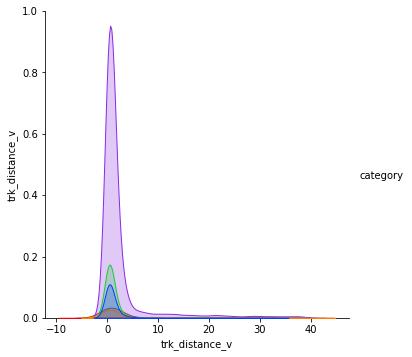

In [8]:
MC_EXT_VIS.reset_index(drop=True, inplace=True)

MC_EXT_VIS_2 = MC_EXT_VIS.copy(deep=True)
MC_EXT_VIS_2 = MC_EXT_VIS_2[['category', 'trk_distance_v']]

MC_EXT_VIS_2 = MC_EXT_VIS_2[MC_EXT_VIS_2['trk_distance_v'] < 40]

fig = sns.pairplot(MC_EXT_VIS_2[['category', 'trk_distance_v']], hue = 'category', palette = 'bright', height=5)

# Exercise 5 Data Visualisation
Lets visualise some of the variables using *seaborn*

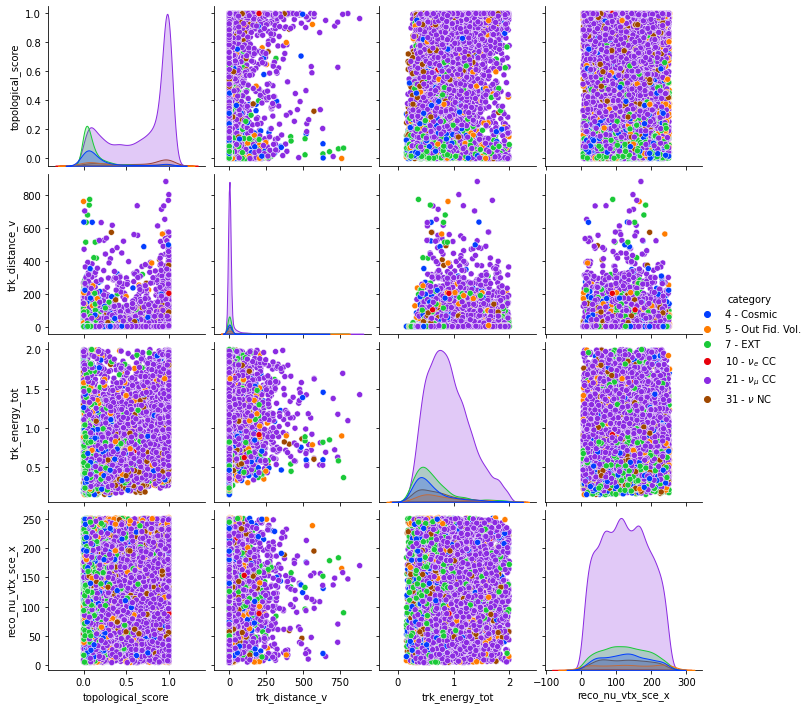

In [9]:
# Visualising a couple of variables.
variable_list = ['category', 'topological_score', 'trk_distance_v', 'trk_energy_tot', 'reco_nu_vtx_sce_x']

# List of categories in text
ptype = [r"Cosmic", r"Out Fid. Vol.", r"EXT", r"$\nu_e$ CC", r"$\nu_{\mu}$ CC", r"$\nu$ NC"]

# Plot data
fig = sns.pairplot(MC_EXT_VIS[variable_list], hue = 'category', palette = 'bright')

# Change location of legend
fig._legend.set_bbox_to_anchor((1.05, 0.5))

# Add Category number and type to legend
for t, l in zip(fig._legend.texts, ptype):
   t.set_text(str(t.get_text()) + " - " + str(l))

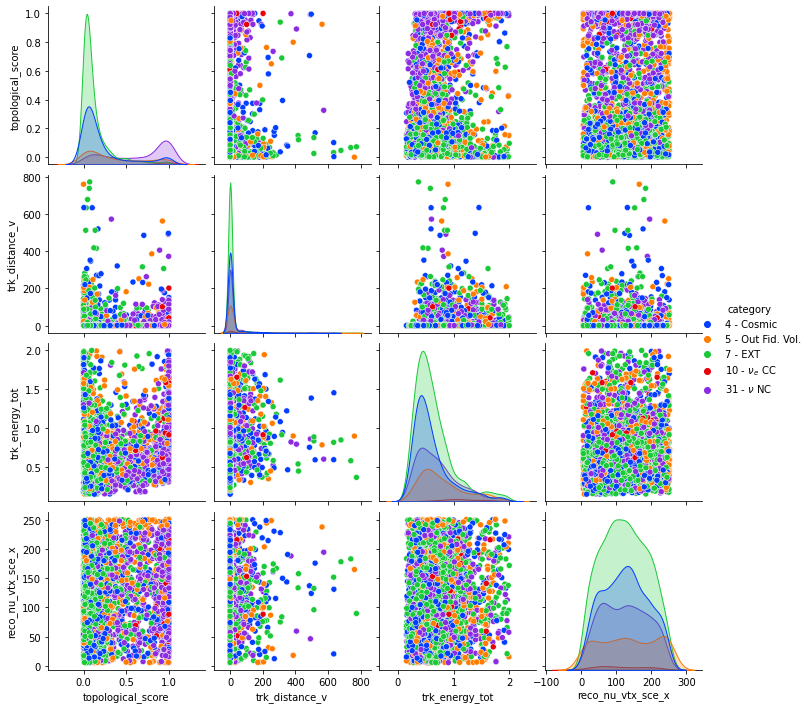

In [10]:
# Create a deep copy of MC_EXT_VIS without signal events
MC_EXT_VIS.reset_index(drop=True, inplace=True)

MC_EXT_VIS_COPY = MC_EXT_VIS.copy(deep=True)
MC_EXT_VIS_COPY.drop(MC_EXT_VIS_COPY[MC_EXT_VIS_COPY.category == 21].index, inplace=True)

# Plot data
fig = sns.pairplot(MC_EXT_VIS_COPY[variable_list], hue = 'category', palette = 'bright')

# Change location of legend
fig._legend.set_bbox_to_anchor((1.05, 0.5))

ptype_new = [r"Cosmic", r"Out Fid. Vol.", r"EXT", r"$\nu_e$ CC", r"$\nu$ NC"]

# Add Category number and type to legend
for t, l in zip(fig._legend.texts, ptype_new):
   t.set_text(str(t.get_text()) + " - " + str(l))

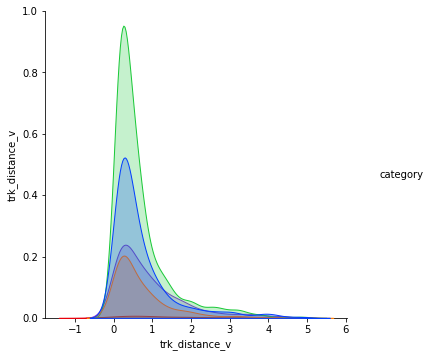

In [11]:
MC_EXT_VIS.reset_index(drop=True, inplace=True)

MC_EXT_VIS_3 = MC_EXT_VIS_COPY.copy(deep=True)
MC_EXT_VIS_3 = MC_EXT_VIS_3[['category', 'trk_distance_v']]

MC_EXT_VIS_3 = MC_EXT_VIS_3[MC_EXT_VIS_3['trk_distance_v'] < 5]

fig = sns.pairplot(MC_EXT_VIS_3[['category', 'trk_distance_v']], hue = 'category', palette = 'bright', height=5)

ptype_new = [r"Cosmic", r"Out Fid. Vol.", r"EXT", r"$\nu_e$ CC", r"$\nu$ NC"]

fig._legend.set_bbox_to_anchor((1.05, 0.5))

# Add Category number and type to legend
for t, l in zip(fig._legend.texts, ptype_new):
   t.set_text(str(t.get_text()) + " - " + str(l))

In [12]:
len(MC_EXT_VIS_3)

3308

In [13]:
# Make sure to delete dataframe copies if you no longer need them!
##del MC_EXT_VIS

# Exercise 6: Random Forest applications

Here we shall modify the shape of our data for its usage in a decision tree, then apply the *RandomForest* method from the skikit-learn package.

In [14]:
# Adjust data shape
features = ['_closestNuCosmicDist', 'trk_len_v', 'trk_distance_v', 'topological_score', 'trk_sce_end_z_v', 'trk_sce_end_y_v', 'trk_sce_end_x_v', 'trk_score_v', 'trk_llr_pid_score_v', 'trk_sce_start_z_v', 'trk_sce_start_y_v', 'trk_sce_start_x_v', 'reco_nu_vtx_sce_x', 'reco_nu_vtx_sce_y', 'reco_nu_vtx_sce_z', 'trk_energy_tot']
output = ['category']

# Setup new database, NEED MORE VALUES
MC_EXT_ML = MC_EXT.copy(deep = True)
MC_EXT_ML = MC_EXT.sample(int(len(MC_EXT)/10))

# Remove muon neutrino and electron neutrino events.

MC_EXT_ML.reset_index(drop=True, inplace=True)
MC_EXT_ML.drop(MC_EXT_ML[MC_EXT_ML.category == 21].index, inplace=True)

MC_EXT_ML.reset_index(drop=True, inplace=True)
MC_EXT_ML.drop(MC_EXT_ML[MC_EXT_ML.category == 10].index, inplace=True)

# Print length of dataframe,, with length N
print("Length of MC dataframe: ", len(MC_EXT_ML))

Length of MC dataframe:  32081


In [15]:
# Setting up input parameters for random forest.
X = MC_EXT_ML[features]
y = np.array(MC_EXT_ML['category'])

# Display shape of X and y, should be (N, 16) (N) where is number of samples.
X_shape = X.shape
y_shape = y.shape
print("(X) (y) shape:")
print(X_shape)
print(y_shape)

# Then split the data up into a "training set" and "test set" using train_test_split.
# Keep the random_state=1 in your arguments
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=1) # 80/20 training/test split

(X) (y) shape:
(32081, 16)
(32081,)


In [16]:
x_train

,_closestNuCosmicDist,trk_len_v,trk_distance_v,topological_score,trk_sce_end_z_v,trk_sce_end_y_v,trk_sce_end_x_v,trk_score_v,trk_llr_pid_score_v,trk_sce_start_z_v,trk_sce_start_y_v,trk_sce_start_x_v,reco_nu_vtx_sce_x,reco_nu_vtx_sce_y,reco_nu_vtx_sce_z,trk_energy_tot
4393,1.207496,30.822851,1.207495,0.990086,336.974152,-24.240602,71.871262,0.828209,0.558302,325.554016,-51.733589,79.45533,79.562546,-52.278210,324.526398,0.793773
714,169.371346,91.8237,185.271057,0.171278,171.988403,119.045898,196.59761,0.993784,0.898694,168.497269,28.541706,188.441132,113.566956,15.632058,0.520544,9999.896215
4157,190.208283,179.674988,1.607139,0.992365,917.803955,117.348091,60.463146,0.999871,0.974317,784.351685,11.872842,8.949679,8.347240,10.766060,783.352783,10000.613627
30391,209.035850,17.862202,16.752529,0.124023,176.541885,72.756721,30.032526,0.44065,0.300755,172.970245,58.892517,19.791431,12.378054,73.818993,174.142044,9999.424888
24342,192.334454,546.969849,0.335306,0.999885,543.616943,55.149113,187.349808,1.0,0.990681,2.011871,23.505232,227.328674,227.363846,23.621014,1.708676,10000.939414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17399,192.650639,17.022036,20.962074,0.997232,1010.119934,-93.140266,56.010876,0.016077,0.663211,998.578857,-101.30661,46.874714,34.465412,-111.621742,985.250122,9999.609880
5221,319.125337,99.277153,0.230089,0.038993,157.652969,-33.182735,88.939812,0.521282,0.907394,161.263458,64.169731,102.347244,102.241234,63.971027,161.191544,9999.454163
12247,78.050274,12.733022,110.055473,0.005469,762.337769,55.754234,2.768603,0.91497,0.419121,757.223694,63.960972,10.833146,100.941063,117.780464,722.606812,9999.710614
235,139.988239,46.157516,29.047827,0.373663,69.358131,-14.073903,23.69413,0.003349,0.197844,41.480183,14.065569,3.359129,1.091380,42.397705,35.415493,9999.793297


Produce your randomforest model and fit it (dont worry, there is no explicit output, but make sure you haven't made your model too big! It shouldn't take any more than a couple of minutes at most to fit).

In [17]:
# Produce randomforest classifier model and fit to training data
# Keep the random_state=1 in your arguments
rf = RandomForestClassifier(n_estimators=1000, max_depth=8, random_state=1)

# Fitting takes the input and "truth" data for classification purposes
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=1000, random_state=1)

Test the accuracies of your results:

In [18]:
# Produce predictions for the classification of your training dataset using your model:
y_pred = rf.predict(x_train)

# plot the accuracies of said predictions
print("Accuracy on training dataset:",metrics.accuracy_score(y_train, y_pred))
rf_acc_train = metrics.accuracy_score(y_train, y_pred)
y_pred = rf.predict(x_test)
print("Accuracy on testing dataset:",metrics.accuracy_score(y_test, y_pred))
rf_acc_test = metrics.accuracy_score(y_test, y_pred)

Accuracy on training dataset: 0.6629130299251871
Accuracy on testing dataset: 0.6333177497272869


If your training accuracy is similar to your testing accuracy, this demonstrates that you haven't overfit your data!

#### Confusion matrix and variable importance

Produce a confusion matrix for your model to quantify its ability to predict your different interaction types.

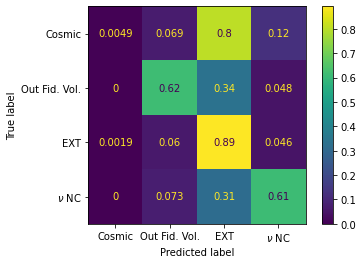

In [19]:
# For labelling your confusion matrix
ptype_no_mu_e = [r"Cosmic", r"Out Fid. Vol.", r"EXT", r"$\nu$ NC"]

# plot your confusion matrix
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ptype_no_mu_e)
disp.plot()
plt.show()

Plot the importance of your different parameters.

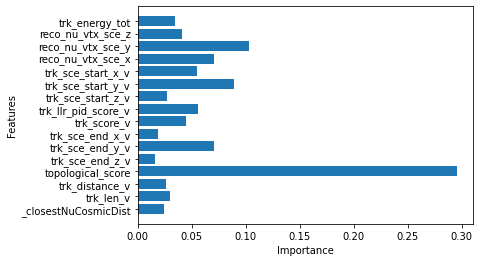

In [20]:
# Plot importance
importance = rf.feature_importances_
ytix = features

plt.barh(range(16), importance)
plt.yticks(range(16), features)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# Neutrino_functions.py

You are given access to a couple of template functions provided within Neutrino_functions.py, which may be helpful in completing this lab. One such function is 'Neutrino_functions.histogram_plot', which can be seen below, but you can create your own functions if you wish.

In [21]:
#This command shows what input you should give the plotting function. The inputs with =None can be left out when calling the function
help(Neutrino_functions.histogram_plot)

Help on function histogram_plot in module Neutrino_functions:

histogram_plot(MC_frame, variable, bins, name, scaling, xlims=[], plot_fig=True, plot_data=False, logscale=None, dataFrame=None, Stat_func=None)
    MC_frame: pandas dataframe - MC dataframe
    variable: string - name of the variable
    bins: int - number of bins
    name: string - name of the plot. The plot is saved
    scaling: array/list - weights you want to apply on MC data
    plot_data: boolean - if True then plots data as well
    logscale: boolean - if True then y axis is log scale
    dataFrame: pandas dataframe - data dataframe



In [22]:
original = MC_EXT.copy(deep=True)

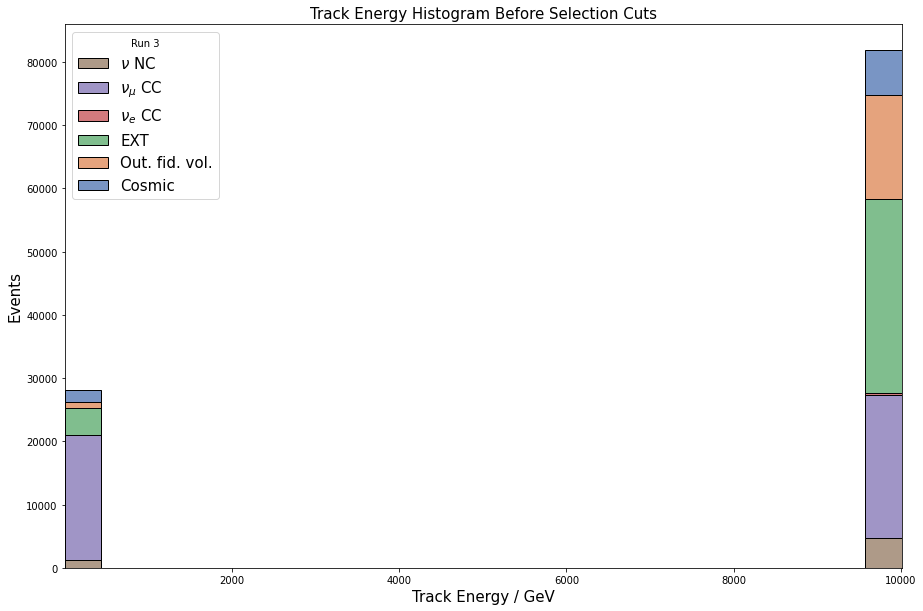

In [23]:
temp = original.copy(deep=True)
trk_energy_tot = temp['trk_energy_tot']
# trk_energy_tot_selection = (trk_energy_tot < 2)
# temp = temp[trk_energy_tot_selection]


BIN = 23
plt.figure(figsize=(15,10))
i = sns.histplot(data=temp, x='trk_energy_tot', multiple="stack", hue="category", palette = 'deep', weights = temp['weight'], bins = BIN, legend = False)
plt.xlabel('Track Energy / GeV', fontsize=15)
plt.ylabel('Events', fontsize=15)
plt.title('Track Energy Histogram Before Selection Cuts', fontsize=15)


#plt.yscale('log')
plt.xlim([np.min(temp['trk_energy_tot']), np.max(temp['trk_energy_tot'])])
plt.legend(title='Run 3',fontsize=15, loc='upper left', labels=[r"$\nu$ NC", r"$\nu_{\mu}$ CC", r"$\nu_e$ CC", r"EXT", r"Out. fid. vol.", r"Cosmic"])
plt.show(i)

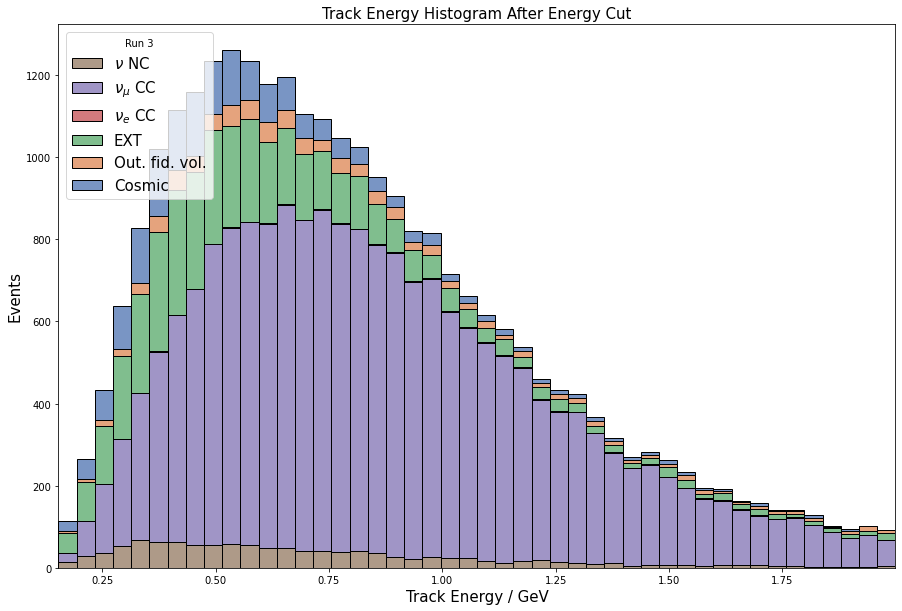

In [24]:
temp = original.copy(deep=True)

trk_energy_tot = temp['trk_energy_tot']
trk_energy_tot_selection = (trk_energy_tot < 2)

temp1 = temp[trk_energy_tot_selection]

BIN = 46
plt.figure(figsize=(15,10))
i = sns.histplot(data=temp1, x='trk_energy_tot', multiple="stack", hue="category", palette = 'deep', weights = temp['weight'], bins = BIN, legend = False)
plt.xlabel('Track Energy / GeV', fontsize=15)
plt.ylabel('Events', fontsize=15)
plt.title('Track Energy Histogram After Energy Cut', fontsize=15)


#plt.yscale('log')
plt.xlim([np.min(temp1['trk_energy_tot']), np.max(temp1['trk_energy_tot'])])
plt.legend(title='Run 3',fontsize=15, loc='upper left', labels=[r"$\nu$ NC", r"$\nu_{\mu}$ CC", r"$\nu_e$ CC", r"EXT", r"Out. fid. vol.", r"Cosmic"])
plt.show(i)

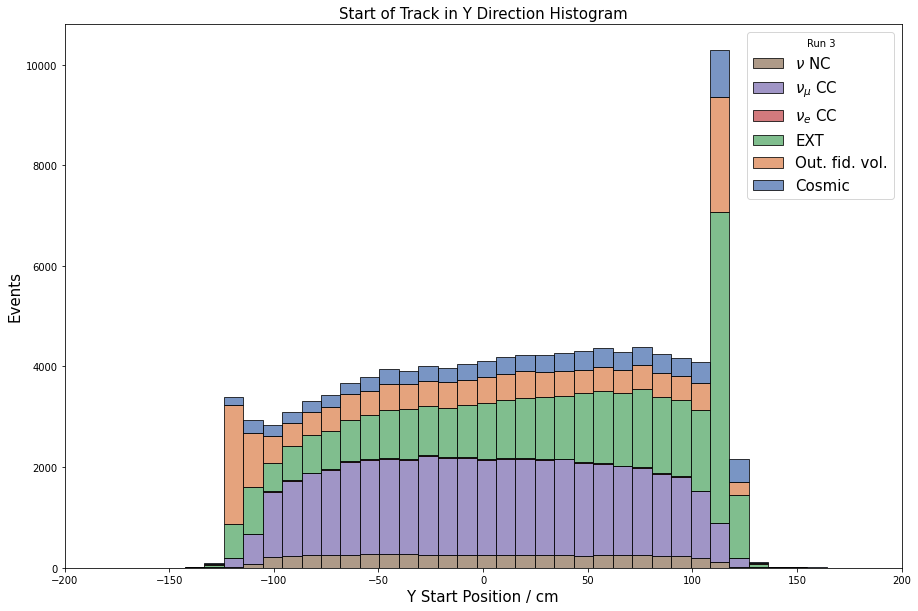

In [25]:
temp = original.copy(deep=True)
y_start = temp['trk_sce_start_y_v']
# topological_selection = (topological > 0.2)
# temp = temp[topological_selection]


BIN = 100
plt.figure(figsize=(15,10))
i = sns.histplot(data=temp, x='trk_sce_start_y_v', multiple="stack", hue="category", palette = 'deep', weights = temp['weight'], bins = BIN, legend = False)
plt.xlabel('Y Start Position / cm', fontsize=15)
plt.ylabel('Events', fontsize=15)
plt.title('Start of Track in Y Direction Histogram', fontsize=15)

#plt.yscale('log')
# plt.xlim([np.min(temp['trk_sce_start_y_v']), np.max(temp['trk_sce_start_y_v'])])
plt.xlim(-200, 200)
plt.legend(title='Run 3',fontsize=15, loc='upper right', labels=[r"$\nu$ NC", r"$\nu_{\mu}$ CC", r"$\nu_e$ CC", r"EXT", r"Out. fid. vol.", r"Cosmic"])
plt.show(i)

# Exercise 7: Selection Cuts and Histogram plotting

Modify selection cuts. Remember to cut the same variables in both data sets.

In [26]:

# BIN = 46
# for index in all_variables_to_plot:
#     plt.figure(figsize=(15,10))
#     i = sns.histplot(data=MC_EXT, x=index, multiple="stack", hue="category", palette = 'deep', weights = MC_EXT['weight'], bins = BIN, legend = False)
#     i.set(xlabel=index, ylabel = "Events")

#     #plt.yscale('log')
#     plt.xlim([np.min(MC_EXT[index]), np.max(MC_EXT[index])])
#     plt.legend(title='Run 3',fontsize=15, loc='upper left', labels=[r"$\nu$ NC", r"$\nu_{\mu}$ CC", r"$\nu_e$ CC", r"EXT", r"Out. fid. vol.", r"Cosmic"])
#     plt.show(i)

In [124]:
def Selections(frame):
    
    # Basic variables present in dataframe
    trk_start_x_v = frame['trk_sce_start_x_v']        # cm
    trk_start_y_v = frame['trk_sce_start_y_v']        # cm
    trk_start_z_v = frame['trk_sce_start_z_v']        # cm
    trk_end_x_v = frame['trk_sce_end_x_v']            # cm
    trk_end_y_v = frame['trk_sce_end_y_v']            # cm
    trk_end_z_v = frame['trk_sce_end_z_v']            # cm
    reco_x = frame['reco_nu_vtx_sce_x']               # cm
    reco_y = frame['reco_nu_vtx_sce_y']               # cm
    reco_z = frame['reco_nu_vtx_sce_z']               # cm
    topological = frame['topological_score']          # N/A
    trk_score_v = frame['trk_score_v']                # N/A
    trk_dis_v = frame['trk_distance_v']               # cm
    trk_len_v = frame['trk_len_v']                    # cm
    trk_energy_tot = frame['trk_energy_tot']          # GeV 
    
    full_length=len(frame)
    
    trk_len_v_selection = (trk_len_v > -1000) & (trk_len_v < 1000)        
    trk_energy_tot_selection = (trk_energy_tot > 0.475) & (trk_energy_tot < 2)
    trk_score_v_selection = (trk_score_v > 0)
    trk_dis_v_selection = (trk_dis_v < 5)
    trk_end_y_v_selection = (trk_end_y_v > -100) & (trk_end_y_v < 100)
    trk_start_y_v_selection = (trk_start_y_v >-100) & (trk_start_y_v <100)
    topological_selection = (topological > 0.2)
    trk_score_selection = (trk_score_v > 0.7)
    reco_x_selection = ((reco_x > 10) & (reco_x<240))
    
    all_selections = [trk_len_v_selection, trk_energy_tot_selection, trk_score_v_selection, trk_dis_v_selection, trk_end_y_v_selection, trk_start_y_v_selection, topological_selection, trk_score_selection, reco_x_selection]
#     # select the conditions you want to apply, here is an initial condition to get you started.
    selections =  (trk_score_v > 0.7) & ((trk_len_v > -1000) & (trk_len_v < 1000)) & ((trk_energy_tot < 2) & (trk_energy_tot > 0.4)) & (trk_score_v > 0) & (trk_dis_v < 5) & ((trk_start_y_v >-100) & (trk_start_y_v <100)) & ((trk_end_y_v > -100) & (trk_end_y_v < 100)) & (topological > 0.2)  & ((reco_x > 10) & (reco_x<240))
#     # Apply selection on dataframe
    all_eff = []
    all_purities = []
    for selection in all_selections:
        frame_copy = frame.copy(deep=True)
        temp_frame = frame_copy[selection]
        surviving_frames = len(temp_frame)
        
        temp_frame.reset_index(drop=True, inplace=True)
        temp_frame_new = temp_frame[temp_frame.category == 21].index
        signal_no = len(temp_frame_new)
        
        eff = surviving_frames / full_length
        pur = signal_no / surviving_frames 
        
        all_eff.append(eff)
        all_purities.append(pur)
    frame1 = frame[selections]
    
    return frame1, all_eff, all_purities

In [28]:
data

,_closestNuCosmicDist,trk_len_v,trk_distance_v,category,topological_score,trk_sce_end_z_v,trk_sce_end_y_v,trk_sce_end_x_v,trk_score_v,trk_llr_pid_score_v,trk_sce_start_z_v,trk_sce_start_y_v,trk_sce_start_x_v,reco_nu_vtx_sce_x,reco_nu_vtx_sce_y,reco_nu_vtx_sce_z,trk_energy_tot
0,48.170196,230.178085,0.289455,0,0.932121,662.713745,-10.419758,0.564317,1.0,0.981798,443.558472,-71.411057,32.10228,32.137272,-71.675980,443.439148,10000.021584
1,48.170196,19.862617,20.065849,0,0.932121,467.605438,-41.015533,40.286861,0.460725,0.722245,455.0065,-55.723381,36.461731,32.137272,-71.675980,443.439148,10000.021584
3,177.083498,174.338699,0.057629,0,0.588847,978.765259,9.115969,153.437668,0.999995,0.970214,852.828674,-36.029785,42.856102,42.869896,-35.978130,852.848938,0.629191
10,0.067737,264.553223,196.515564,0,0.002079,998.799072,18.552534,225.164139,1.0,0.977688,797.282776,63.213791,63.001648,160.463943,-113.297066,772.441833,10000.778217
11,36.361293,493.096283,0.465464,0,0.983048,865.795166,-56.678547,80.313004,1.0,0.990403,408.639801,96.316406,141.032898,141.039246,96.385994,408.178772,1.296849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389448,95.722545,92.994888,396.635223,0,0.014082,46.944588,116.352737,67.0942,0.99936,0.85618,70.417984,31.287842,92.912865,25.285788,106.608055,454.572327,9999.631083
389449,95.722545,11.709758,166.443726,0,0.014082,465.42984,122.604523,189.047379,0.019354,0.461702,464.63028,112.029297,190.473724,25.285788,106.608055,454.572327,9999.631083
389451,103.401270,182.949554,0.28909,0,0.101421,955.642639,116.216316,115.24794,1.0,0.971342,793.728394,37.36002,99.886131,99.867477,37.655113,793.773193,9999.677782
389453,61.527838,352.968567,0.275442,0,0.979009,1036.627563,82.489006,67.828445,1.0,0.987493,688.785034,80.370071,10.267623,10.359276,80.593437,688.916870,10000.114375


## Calls the selection function on the dataframes

In [125]:
MC_EXT_new, effs, purs = Selections(MC_EXT)
data_frame, _, _ = Selections(data)

In [30]:
MC_EXT_new

,_closestNuCosmicDist,trk_len_v,trk_distance_v,category,topological_score,trk_sce_end_z_v,trk_sce_end_y_v,trk_sce_end_x_v,trk_score_v,trk_llr_pid_score_v,trk_sce_start_z_v,trk_sce_start_y_v,trk_sce_start_x_v,reco_nu_vtx_sce_x,reco_nu_vtx_sce_y,reco_nu_vtx_sce_z,trk_energy_tot,weight
0,124.478148,225.284348,1.286398,21,0.994485,510.146088,-19.997118,191.864334,1.0,0.977081,343.433655,35.865448,54.776821,53.900658,36.203041,342.578735,1.164239,0.000002
18,102.236239,336.885345,0.551396,21,0.303120,928.724365,-90.971352,79.272659,1.0,0.986322,635.740723,71.252426,92.555511,92.325119,71.708237,635.880127,0.868494,0.186696
25,116.876312,63.389645,0.633116,21,0.884215,465.989136,-58.62722,82.079384,0.974152,0.926682,410.665558,-87.696518,73.786499,73.916153,-88.119781,410.201050,0.674289,0.158957
28,119.721243,47.916477,1.365335,21,0.615630,905.803589,53.816448,99.981354,0.968874,0.874414,862.766052,51.078331,79.935005,79.323479,51.135880,861.537048,1.261799,0.158957
33,33.621768,349.355042,0.246664,21,0.998728,714.887756,-99.810875,109.170898,1.0,0.987402,384.947144,-25.611467,26.167374,26.011066,-25.452852,385.042236,1.158893,0.158957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555196,0.203121,134.173874,0.203121,7,0.309409,913.540588,-46.766342,219.991287,0.999933,0.959241,825.85321,-85.64048,126.964516,126.895973,-85.826591,825.909607,0.488431,0.257732
555308,40.219258,144.052231,0.087213,7,0.393715,320.797058,-47.777969,53.326229,0.999521,0.965019,188.69426,-59.269112,104.64299,104.696365,-59.213730,188.731232,0.448730,0.257732
555378,71.256817,51.514103,1.850222,7,0.335004,381.998566,-11.594328,50.527828,0.984254,0.826547,407.03598,-40.715775,84.685478,85.833839,-42.094673,406.683380,0.456845,0.257732
555513,162.263533,104.242981,2.194518,7,0.424067,215.243515,-10.3677,100.932739,0.999008,0.921419,164.776947,-78.9366,160.449158,160.871201,-80.448944,166.469666,0.461459,0.257732


In [31]:
data_frame

,_closestNuCosmicDist,trk_len_v,trk_distance_v,category,topological_score,trk_sce_end_z_v,trk_sce_end_y_v,trk_sce_end_x_v,trk_score_v,trk_llr_pid_score_v,trk_sce_start_z_v,trk_sce_start_y_v,trk_sce_start_x_v,reco_nu_vtx_sce_x,reco_nu_vtx_sce_y,reco_nu_vtx_sce_z,trk_energy_tot
3,177.083498,174.338699,0.057629,0,0.588847,978.765259,9.115969,153.437668,0.999995,0.970214,852.828674,-36.029785,42.856102,42.869896,-35.978130,852.848938,0.629191
11,36.361293,493.096283,0.465464,0,0.983048,865.795166,-56.678547,80.313004,1.0,0.990403,408.639801,96.316406,141.032898,141.039246,96.385994,408.178772,1.296849
165,200.240064,141.441833,0.728723,0,0.769795,23.525881,-15.521919,6.777124,0.999706,0.819561,59.999039,8.299944,140.955826,141.630051,8.193906,60.148083,0.625486
167,200.240064,6.449646,4.252118,0,0.769795,67.308113,11.05552,147.973282,0.793538,0.248862,63.326035,7.909087,144.281403,141.630051,8.193906,60.148083,0.625486
198,88.273760,279.388763,0.489595,0,0.974362,948.411682,-27.25873,122.255554,1.0,0.981939,696.215942,81.434784,124.29509,124.306923,81.291458,695.749817,0.907045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389289,50.739089,155.324921,0.567109,0,0.999713,659.768799,-33.013538,214.14592,0.999995,0.972987,509.714417,-41.094944,176.643478,176.513489,-41.740150,509.691467,0.877455
389291,50.739089,14.023591,0.504489,0,0.999713,507.052094,-32.3899,166.004059,0.879726,-0.150867,509.250366,-41.527916,176.349991,176.513489,-41.740150,509.691467,0.877455
389316,141.025509,140.755249,0.225887,0,0.521682,662.544617,7.202012,38.039009,0.999709,0.969182,541.634399,78.110809,42.854595,42.725113,78.293465,541.624390,0.762906
389380,114.313365,47.061474,0.287986,0,0.527720,791.652649,15.939626,155.638443,0.929467,0.796459,760.782104,-17.737465,166.196198,166.229095,-17.717651,761.067139,0.441158


In [126]:
temp = MC_EXT.copy(deep=True)
full_length = len(temp)
temp.reset_index(drop=True, inplace=True)
temp_new = temp[temp.category == 21].index
signal_no = len(temp_new)

MC_EXT_new.reset_index(drop=True, inplace=True)
MC_EXT_final_new = MC_EXT_new[MC_EXT_new.category == 21].index
final_signal_no = len(MC_EXT_final_new)
final_full_length = len(MC_EXT_new)

orig_purity = signal_no / full_length

final_purity = final_signal_no / final_full_length

print(effs)
print(purs)
print("Original Purity (Before Cuts): ")
print(orig_purity)
print("Final Purity (After Cuts): ")
print(final_purity)

print("Efficiency: ")
print(final_full_length / full_length)

[0.9996724403553482, 0.21110499186500223, 0.9999406073171785, 0.7230447208903863, 0.7401336155385656, 0.7889849970483637, 0.5343973622449715, 0.7276251565807093, 0.879886397995767]
[0.4215039554084855, 0.7904343748667889, 0.4214629106662995, 0.4131019736596464, 0.449997081967532, 0.4875735379660066, 0.627382764613167, 0.4336163013312358, 0.4554231456822245]
Original Purity (Before Cuts): 
0.4214720746404043
Final Purity (After Cuts): 
0.8963747889889856
Efficiency: 
0.10768253351187133


# Plot all variables and decide on selection cuts
Here is the section with the example histogram plots for each variable. Create a new cell and implement your own function to plot all the histograms.

In [33]:
# Common variables in both dataframes
all_variables_to_plot = list(set(list(MC_EXT)).intersection(list(data_frame)))
print(all_variables_to_plot)

['trk_len_v', 'topological_score', 'trk_sce_end_y_v', 'trk_llr_pid_score_v', 'trk_sce_start_x_v', 'trk_sce_end_z_v', 'reco_nu_vtx_sce_y', 'reco_nu_vtx_sce_x', '_closestNuCosmicDist', 'trk_sce_start_y_v', 'category', 'trk_sce_end_x_v', 'trk_energy_tot', 'trk_sce_start_z_v', 'trk_distance_v', 'trk_score_v', 'reco_nu_vtx_sce_z']


In [34]:
# # Simple histogram plot of one variable.
# BIN = 46
# for index in all_variables_to_plot:
#     plt.figure(figsize=(15,10))
#     i = sns.histplot(data=MC_EXT_new, x=index, multiple="stack", hue="category", palette = 'deep', weights = MC_EXT_new['weight'], bins = BIN, legend = False)
#     i.set(xlabel=index, ylabel = "Events")

#     #plt.yscale('log')
#     plt.xlim([np.min(MC_EXT_new[index]), np.max(MC_EXT_new[index])])
#     plt.legend(title='Run 3',fontsize=15, loc='upper left', labels=[r"$\nu$ NC", r"$\nu_{\mu}$ CC", r"$\nu_e$ CC", r"EXT", r"Out. fid. vol.", r"Cosmic"])
#     plt.show(i)

# Exercise 8: Check the purity and efficiency of the sample
It is recommended to plot purity and efficiency after each variable cut.

**HINT:** Function Selection() has commented lines of code that you may find useful for purpose of plotting changes in purity/efficiency after every cut.

In [35]:
MC_EXT_new['trk_energy_tot']

0        1.164239
1        0.868494
2        0.674289
3        1.261799
4        1.158893
           ...   
59826    0.488431
59827    0.448730
59828    0.456845
59829    0.461459
59830    0.461459
Name: trk_energy_tot, Length: 59831, dtype: float64

# Exercise 9: Plot the energy spectrums here and normalise

Final representation of MC and data after applying the cuts.

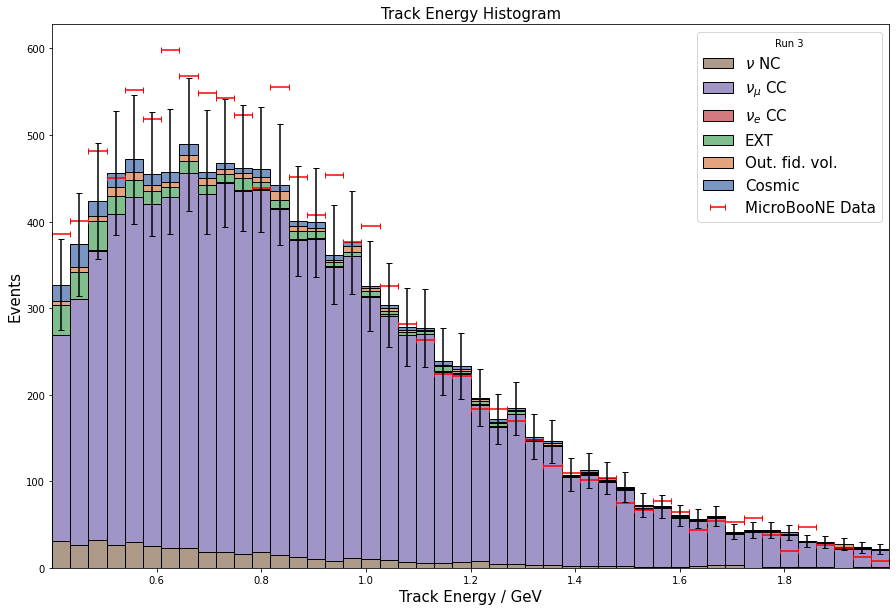

In [127]:
BIN = 46
index = 'trk_energy_tot'

counts, bins = np.histogram(MC_EXT_new['trk_energy_tot'], bins=BIN, weights=MC_EXT_new['weight'])
errors = counts * 0.15
se_counts = np.sqrt(counts)

total_error = np.sqrt(se_counts**2 + errors**2)

data_counts, data_bins = np.histogram(data_frame['trk_energy_tot'], bins=BIN)

plt.figure(figsize=(15,10))
i = sns.histplot(data=MC_EXT_new, x=index, multiple="stack", hue="category", palette = 'deep', weights = MC_EXT_new['weight'], bins = BIN, legend = False)
plt.xlabel('Track Energy / GeV', fontsize=15)
plt.ylabel('Events', fontsize=15)
plt.title('Track Energy Histogram', fontsize=15)

centers = (bins[:-1] + bins[1:]) / 2

plt.errorbar(centers, data_counts, xerr=(data_bins[1]-data_bins[0]) / 2, fmt='none', color='r', capsize=3)
plt.errorbar(centers, counts, yerr=total_error, fmt='none', color='k', capsize=3)

#plt.yscale('log')
plt.xlim([np.min(MC_EXT_new[index]), np.max(MC_EXT_new[index])])
plt.legend(title='Run 3',fontsize=15, loc='upper right', labels=[r"$\nu$ NC", r"$\nu_{\mu}$ CC", r"$\nu_e$ CC", r"EXT", r"Out. fid. vol.", r"Cosmic", "MicroBooNE Data"])
plt.show(i)

In [37]:
data_frame

,_closestNuCosmicDist,trk_len_v,trk_distance_v,category,topological_score,trk_sce_end_z_v,trk_sce_end_y_v,trk_sce_end_x_v,trk_score_v,trk_llr_pid_score_v,trk_sce_start_z_v,trk_sce_start_y_v,trk_sce_start_x_v,reco_nu_vtx_sce_x,reco_nu_vtx_sce_y,reco_nu_vtx_sce_z,trk_energy_tot
3,177.083498,174.338699,0.057629,0,0.588847,978.765259,9.115969,153.437668,0.999995,0.970214,852.828674,-36.029785,42.856102,42.869896,-35.978130,852.848938,0.629191
11,36.361293,493.096283,0.465464,0,0.983048,865.795166,-56.678547,80.313004,1.0,0.990403,408.639801,96.316406,141.032898,141.039246,96.385994,408.178772,1.296849
165,200.240064,141.441833,0.728723,0,0.769795,23.525881,-15.521919,6.777124,0.999706,0.819561,59.999039,8.299944,140.955826,141.630051,8.193906,60.148083,0.625486
167,200.240064,6.449646,4.252118,0,0.769795,67.308113,11.05552,147.973282,0.793538,0.248862,63.326035,7.909087,144.281403,141.630051,8.193906,60.148083,0.625486
198,88.273760,279.388763,0.489595,0,0.974362,948.411682,-27.25873,122.255554,1.0,0.981939,696.215942,81.434784,124.29509,124.306923,81.291458,695.749817,0.907045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389289,50.739089,155.324921,0.567109,0,0.999713,659.768799,-33.013538,214.14592,0.999995,0.972987,509.714417,-41.094944,176.643478,176.513489,-41.740150,509.691467,0.877455
389291,50.739089,14.023591,0.504489,0,0.999713,507.052094,-32.3899,166.004059,0.879726,-0.150867,509.250366,-41.527916,176.349991,176.513489,-41.740150,509.691467,0.877455
389316,141.025509,140.755249,0.225887,0,0.521682,662.544617,7.202012,38.039009,0.999709,0.969182,541.634399,78.110809,42.854595,42.725113,78.293465,541.624390,0.762906
389380,114.313365,47.061474,0.287986,0,0.527720,791.652649,15.939626,155.638443,0.929467,0.796459,760.782104,-17.737465,166.196198,166.229095,-17.717651,761.067139,0.441158


## Bin Check

In [38]:
N = len(MC_EXT_new['trk_energy_tot'])
N_max = np.max(counts)

H = np.log2(N/N_max) + 1
M = np.log2(N) / H
M

2.0001100394562767

## Note systematic error is ~dominant except from when counts are very small - here errors are ~ equal.

# Exercise 10: Oscillation and fitting

### Define functions requires for Oscillation analysis, test that they work!


In [128]:
# oscillation function
def dis(sin_sqr_2theta, del_m_sqr, energy):
    length=0.47
    
    arg = (1.27 * (del_m_sqr) * length) / energy
    
    probability = sin_sqr_2theta * (np.sin(arg)**2)
    return 1-probability


# muon disappearance application to reconstructed neutrino energy
sin_sqr_2theta = 0.9

del_m_sqr = 0.003

scaled_counts = []
final_errors = []

def scaling(paras, counts, errs):
    dis_fracs = dis(paras[0], paras[1], centers)
    new_counts = counts * dis_fracs
    new_error = errs * dis_fracs
    return new_counts, new_error

# chi squared function

def chi_sqr_func(paras, MC_counts, data_counts, err):

    pred_counts, new_errs = scaling(paras, MC_counts, err)

    chi = np.sum((pred_counts - data_counts)**2 / (new_errs**2))
    return chi

# Exercise 11/12: Oscillation parameter scan, contour plotting
Apply your above defined functions, and represent your result with matplotlib's contour and fcontour.

In [129]:
from scipy.optimize import fmin

def fit_function(para_i, MC_data, data_data, err):
    fit = fmin(chi_sqr_func, para_i, args=(MC_data, data_data, err), full_output=True, disp=1)
    paras = fit[0]
    min_chi = fit[1]
    return paras, min_chi

def meshing(array):

    mesh = np.empty((0, len(array)))
    for _ , iterator in enumerate(array):
        mesh = np.vstack((mesh, array))
    return mesh

In [130]:
final_paras, min_chi = fit_function((sin_sqr_2theta, del_m_sqr), counts, data_counts, total_error)

final_theta = final_paras[0]
final_del_m_sqr = final_paras[1]

print(min_chi)
print(final_paras)

Optimization terminated successfully.
         Current function value: 51.083348
         Iterations: 44
         Function evaluations: 91
51.08334752100683
[ 1.07148279e+00 -1.92361184e-09]


In [131]:
# theta_array = np.linspace(0.01, 0.37, 100)
# del_m_sqr_array = np.linspace(1e-1, 1e2, 100)

theta_array = np.linspace(1e-3,0.9,100)
del_m_sqr_array = np.linspace(1e-2, 1e2, 100)

theta_mesh, m_mesh = np.meshgrid(theta_array, del_m_sqr_array)

theta_mesh_list = theta_mesh.flatten()
m_mesh_list = m_mesh.flatten()

theta_m_list = np.column_stack((theta_mesh_list, m_mesh_list))

chi_square_list = np.empty((0, len(theta_m_list)))

for pair in theta_m_list:
    chi_square = chi_sqr_func(pair, counts, data_counts, total_error)
    chi_square_list = np.append(chi_square_list, chi_square)

chi_square_mesh = np.reshape(chi_square_list, (-1, len(theta_array)))

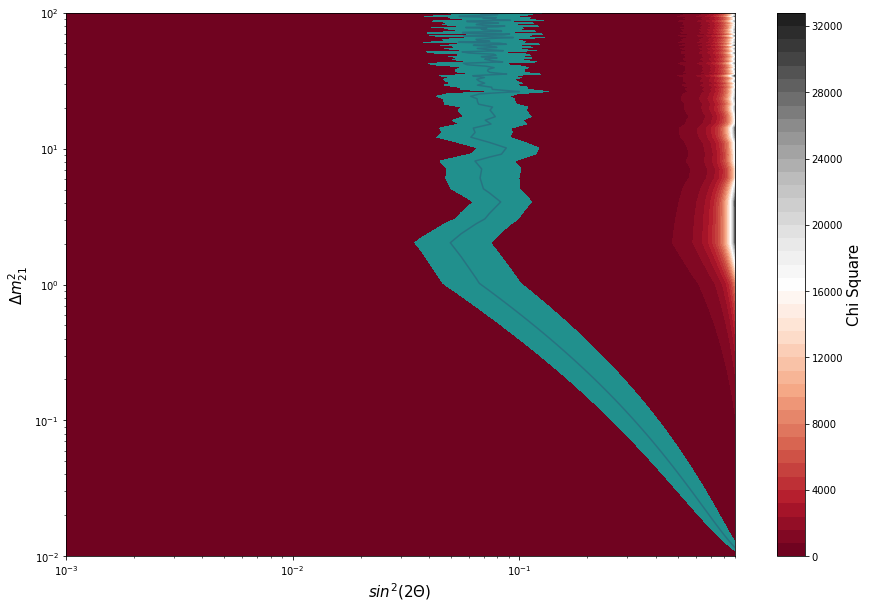

In [132]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)
cp = ax.contourf(theta_mesh, m_mesh, chi_square_mesh, levels=50, cmap='RdGy')

cp2 = ax.contourf(theta_mesh, m_mesh, chi_square_mesh, levels=[58.641, 71.201])
cp_test = ax.contour(theta_mesh, m_mesh, chi_square_mesh, levels=[58.641, 71.201], alpha=0)
cp3 = ax.contour(theta_mesh, m_mesh, chi_square_mesh, levels=[62.830], alpha=0.2)


cbar=fig.colorbar(cp)
cbar.ax.set_ylabel('Chi Square', fontsize=15)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$sin^2(2\Theta)$ ', fontsize=15)
plt.ylabel('$\Delta m_{21}^2$', fontsize=15)
plt.show()

### Bonus: Minimise

Minimise your chi square value, determining the parameters of 'best fit'

### Confidence levels and parameter minima. 
Determine confidence levels, and find the parameter values that correspond to the lowest chi squared value within your range.with

In [44]:
# contour application, with correct confidence levels.

In [45]:
# find lowest chi squared value within range and plot with CL, or contourf plot.

# Exercise 13/14: 3+1 Framework Neutrino disappearance.

In [133]:
a = 0.24

sin_sqr_theta_mu_e = (a / (np.sqrt(1-a) + 1)) * (1 - np.sqrt(1-theta_array))
# sin_sqr_theta_mu_e = (a / 2) * (1 - np.sqrt(1-theta_array))

theta_mesh_2, m_mesh_2 = np.meshgrid(sin_sqr_theta_mu_e, del_m_sqr_array)

theta_mesh_list_2 = theta_mesh.flatten()
m_mesh_list_2 = m_mesh.flatten()

theta_m_list_2 = np.column_stack((theta_mesh_list_2, m_mesh_list_2))


In [134]:
# u = (a / (np.sqrt(1-a) + 1)) * (1 - np.sqrt(1-(np.sin(0.8))**2))
u = (a / 2) * (1 - np.sqrt(1-(np.sin(0.8))**2))
u

0.03639519487834015

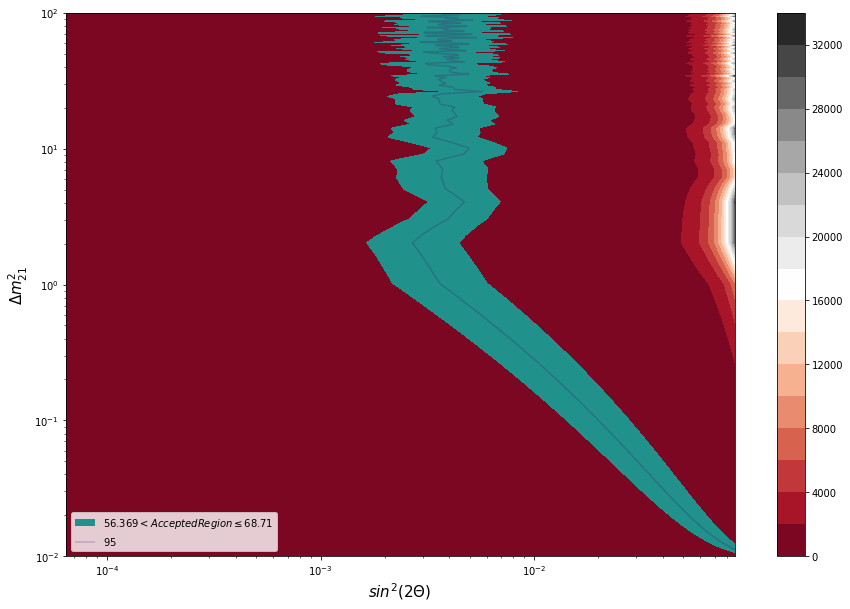

In [135]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)
# cp_new = ax.contourf(theta_mesh_2, m_mesh_2, chi_square_mesh, levels=20, cmap='RdGy')
# cp2_new = ax.contourf(theta_mesh_2, m_mesh_2, chi_square_mesh, levels=[29.615, 38.932])
# cp_test_new = ax.contour(theta_mesh_2, m_mesh_2, chi_square_mesh, levels=[29.615, 38.932], alpha=0)
# cp3_new = ax.contour(theta_mesh_2, m_mesh_2, chi_square_mesh, levels=[32.671], alpha=0.2)

cp_new = ax.contourf(theta_mesh_2, m_mesh_2, chi_square_mesh, levels=20, cmap='RdGy')
cp2_new = ax.contourf(theta_mesh_2, m_mesh_2, chi_square_mesh, levels=[56.369, 68.710])
cp_test_new = ax.contour(theta_mesh_2, m_mesh_2, chi_square_mesh, levels=[56.369, 68.710], alpha=0)
cp3_new = ax.contour(theta_mesh_2, m_mesh_2, chi_square_mesh, levels=[60.481], alpha=0.2)

left = ax.contour(theta_mesh_2, m_mesh_2, chi_square_mesh, levels=[56.369], alpha=0)
right = ax.contour(theta_mesh_2, m_mesh_2, chi_square_mesh, levels=[68.710], alpha=0)

h2, l2 = cp2_new.legend_elements('Accepted Region')
h3, l3 = cp3_new.legend_elements('95%')
ax.legend(h2+h3, l2+l3, loc='lower left')
cbar = fig.colorbar(cp_new)

cbar=fig.colorbar(cp)
cbar.ax.set_ylabel('Chi Square', fontsize=15)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$sin^2(2\Theta)$ ', fontsize=15)
plt.ylabel('$\Delta m_{21}^2$', fontsize=15)
plt.show()

In [136]:
accepted_values = cp2_new.allsegs[0][0]
left_values = left.allsegs[0][0]
right_values = right.allsegs[0][0]
middle_values = cp3_new.allsegs[0][0]

# Compare your result with MiniBooNE

Results are extracted from MiniBooNE (orange) and LSND (blue)

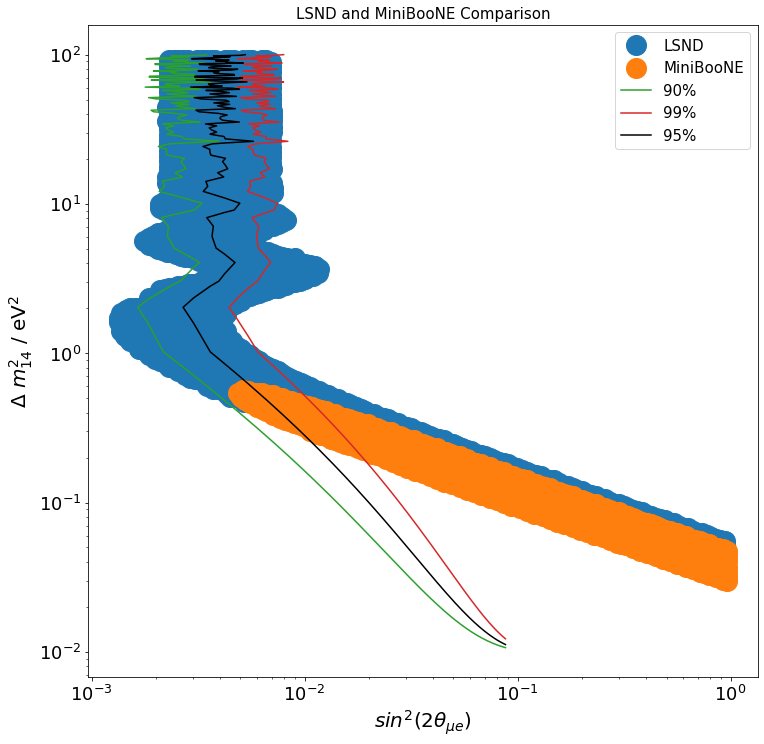

In [137]:
# Load data
LSND_data = pd.read_csv('./data/DataSet_LSND.csv').to_numpy()
MiniBooNE_data = pd.read_csv('./data/DataSet_MiniBooNE.csv').to_numpy()


plt.figure(figsize=(12,12))
# Plot data
plt.title('LSND and MiniBooNE Comparison', fontsize=15)
plt.plot(LSND_data[:,0],LSND_data[:,1],'o',markersize=20,label='LSND')
plt.plot(MiniBooNE_data[:,0],MiniBooNE_data[:,1],'o', markersize=20, label='MiniBooNE')
plt.plot(left_values[:,0], left_values[:,1], '-', label='90%')
plt.plot(right_values[:,0], right_values[:,1], '-', label='99%')
plt.plot(middle_values[:,0], middle_values[:,1], '-', label='95%', c='k')
plt.legend(prop={'size': 15})

plt.xlabel(r'$sin^2(2\theta_{\mu e})$',fontsize=20)
plt.ylabel(r'$\Delta$ $m_{14}^2$ / eV$^2$',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.yscale('log')
plt.xscale('log')
plt.show()

## Oscillating

In [52]:
def Selections(frame):

    trk_energy_tot = frame['trk_energy_tot']          # GeV 

    full_length=len(frame)

    trk_energy_tot_selection =  (trk_energy_tot < 2)


#     # select the conditions you want to apply, here is an initial condition to get you started.
    selections = (trk_energy_tot < 2)

    frame1 = frame[selections]

    return frame1


po_data_new = Selections(po_data)
MC_EXT_new = Selections(MC_EXT)

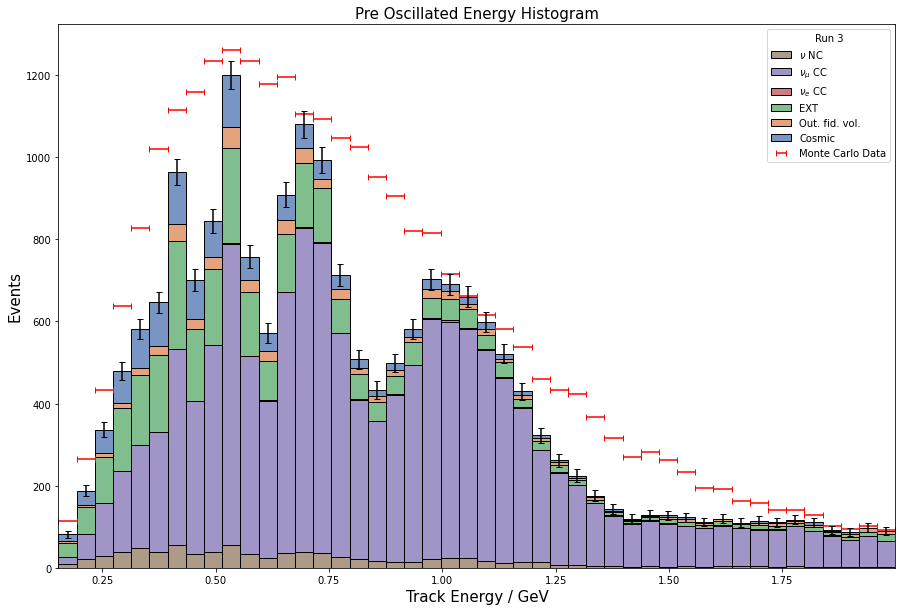

In [53]:
po_counts, po_bins = np.histogram(po_data_new['trk_energy_tot'], bins=BIN, weights=po_data_new['weight'])
po_se_counts = np.sqrt(po_counts)

index = 'trk_energy_tot'

po_total_error = np.sqrt(po_se_counts**2)

MC_counts, MC_bins = np.histogram(MC_EXT_new['trk_energy_tot'], bins=BIN, weights=MC_EXT_new['weight'])

plt.figure(figsize=(15,10))
i = sns.histplot(data=po_data_new, x=index, multiple="stack", hue="category", palette = 'deep', weights = po_data_new['weight'], bins = BIN, legend = False)
plt.xlabel("Track Energy / GeV", fontsize=15)
plt.ylabel("Events", fontsize=15)
plt.title("Pre Oscillated Energy Histogram", fontsize=15)

centers = (po_bins[:-1] + po_bins[1:]) / 2

plt.errorbar(centers, MC_counts, xerr=(MC_bins[1]-MC_bins[0]) / 2, fmt='none', color='r', capsize=3, label='Monte Carlo data')
plt.errorbar(centers, po_counts, yerr=po_total_error, fmt='none', color='k', capsize=3)
plt.legend()
# plt.yscale('log')
plt.xlim([np.min(po_data_new[index]), np.max(po_data_new[index])])
plt.legend(title='Run 3',fontsize=10, loc='upper right', labels=[r"$\nu$ NC", r"$\nu_{\mu}$ CC", r"$\nu_e$ CC", r"EXT", r"Out. fid. vol.", r"Cosmic", "Monte Carlo Data"])
plt.show(i)

In [54]:
po_data_new

,_closestNuCosmicDist,trk_len_v,trk_distance_v,category,topological_score,trk_sce_end_z_v,trk_sce_end_y_v,trk_sce_end_x_v,trk_score_v,trk_llr_pid_score_v,trk_sce_start_z_v,trk_sce_start_y_v,trk_sce_start_x_v,reco_nu_vtx_sce_x,reco_nu_vtx_sce_y,reco_nu_vtx_sce_z,trk_energy_tot,weight
0,124.478148,225.284348,1.286398,21,0.994485,510.146088,-19.997118,191.864334,1.0,0.977081,343.433655,35.865448,54.776821,53.900658,36.203041,342.578735,1.164239,0.000002
1,124.478148,7.850903,131.947891,21,0.994485,389.239197,46.669083,183.160797,0.041434,0.486446,382.998871,47.109879,178.486572,53.900658,36.203041,342.578735,1.164239,0.000002
13,0.278488,75.551727,0.208943,21,0.984373,559.447205,-81.352386,93.415474,0.902821,0.897909,552.531433,-101.085739,165.269608,165.071518,-101.099983,552.576782,0.888904,0.083159
14,0.278488,27.239777,386.296997,21,0.984373,202.525604,113.942856,176.226593,0.979166,0.486213,212.248871,92.057907,188.679962,165.071518,-101.099983,552.576782,0.888904,0.083159
18,102.236239,336.885345,0.551396,21,0.303120,928.724365,-90.971352,79.272659,1.0,0.986322,635.740723,71.252426,92.555511,92.325119,71.708237,635.880127,0.868494,0.087464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555596,76.024980,7.99752,0.538643,7,0.116339,282.153351,-29.215939,225.045227,0.903681,-0.2201,276.646088,-23.823,222.970535,222.942764,-23.265814,276.450287,0.502524,0.206348
555605,62.713589,48.868893,0.853376,7,0.266663,263.829285,38.911724,70.455521,0.936582,0.874406,231.70575,18.823273,39.80508,39.571785,18.093496,232.065674,0.348882,0.253358
555606,14.191840,84.706787,14.191839,7,0.081222,211.199844,117.15139,64.000977,0.984937,0.92492,184.095001,37.155041,68.710518,70.204613,25.409273,176.441956,0.578289,0.145261
555607,14.191840,14.454257,1.875599,7,0.081222,182.827652,10.867104,73.305717,0.909752,0.46393,177.321533,23.822159,70.63652,70.204613,25.409273,176.441956,0.578289,0.145261


Optimization terminated successfully.
         Current function value: 17.704479
         Iterations: 35
         Function evaluations: 67
17.704478713474405
0.4023745162153274
[ 0.54571207 11.11934259]


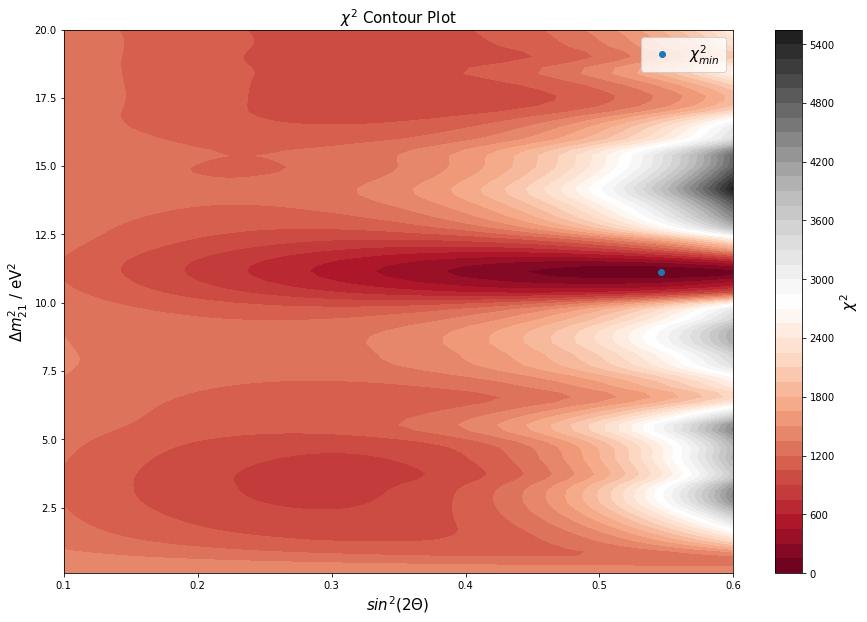

In [55]:
theta_array = np.linspace(0.1, 0.6, 500)
del_m_sqr_array = np.linspace(1e-1, 20, 100)

theta_mesh, m_mesh = np.meshgrid(theta_array, del_m_sqr_array)

theta_mesh_list = theta_mesh.flatten()
m_mesh_list = m_mesh.flatten()

theta_m_list = np.column_stack((theta_mesh_list, m_mesh_list))

chi_square_list = np.empty((0, len(theta_m_list)))

for pair in theta_m_list:
    chi_square = chi_sqr_func(pair, MC_counts, po_counts, total_error)
    chi_square_list = np.append(chi_square_list, chi_square)
    
chi_square_mesh = np.reshape(chi_square_list, (-1, len(theta_array)))

sin_sqr_2theta = 0.4
del_m_sqr = 10

final_paras, min_chi = fit_function((sin_sqr_2theta, del_m_sqr), MC_counts, po_counts, total_error)

final_theta = final_paras[0]
final_del_m_sqr = final_paras[1]

print(min_chi)
print(min_chi/44)
print(final_paras)

fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)
cp = ax.contourf(theta_mesh, m_mesh, chi_square_mesh, levels=40, cmap='RdGy')
# cp = ax.contour(theta_mesh, m_mesh, chi_square_mesh, levels=[min_chi+1.00,min_chi+2.30,min_chi+5.99,min_chi+9.21], cmap='RdGy')
plt.plot(final_theta, final_del_m_sqr,'o', label='$\chi^2_{min}$')


cbar=fig.colorbar(cp)
cbar.ax.set_ylabel('$\chi^2$', fontsize=15)
# plt.xscale('log')
# plt.yscale('log')
plt.xlabel('$sin^2(2\Theta)$ ', fontsize=15)
plt.ylabel('$\Delta m_{21}^2$ / eV$^2$', fontsize=15)
plt.title("$\chi^2$ Contour Plot", fontsize=15)
plt.legend(fontsize=15)
plt.show()

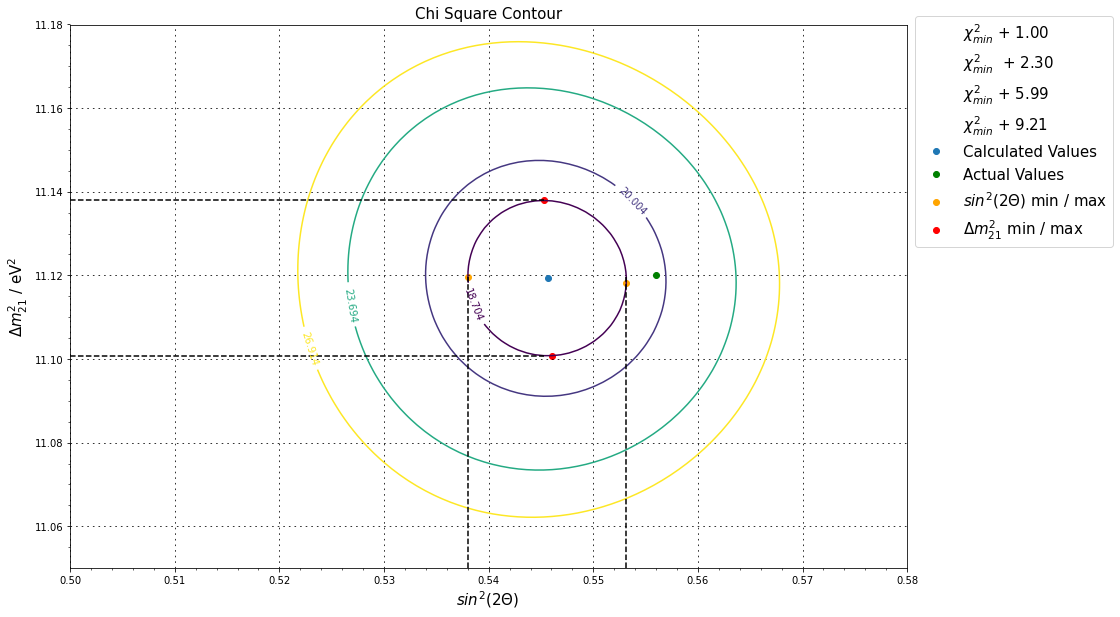

In [56]:
min_theta = 0.5
min_m = 11.05

theta_array = np.linspace(min_theta, 0.58, 100)
del_m_sqr_array = np.linspace(min_m, 11.18, 100)

theta_mesh, m_mesh = np.meshgrid(theta_array, del_m_sqr_array)

theta_mesh_list = theta_mesh.flatten()
m_mesh_list = m_mesh.flatten()

theta_m_list = np.column_stack((theta_mesh_list, m_mesh_list))

chi_square_list = np.empty((0, len(theta_m_list)))

for pair in theta_m_list:
    chi_square = chi_sqr_func(pair, MC_counts, po_counts, total_error)
    chi_square_list = np.append(chi_square_list, chi_square)
    
chi_square_mesh = np.reshape(chi_square_list, (-1, len(theta_array)))


actual_coord = (0.556, 11.120)

fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)
cp = ax.contour(theta_mesh, m_mesh, chi_square_mesh, levels=[min_chi+1.00,min_chi+2.30,min_chi+5.99,min_chi+9.21])
plt.plot(final_theta, final_del_m_sqr,'o', label="Calculated Values")
plt.plot(actual_coord[0], actual_coord[1], 'o', c='green',label="Actual Values")
plt.clabel(cp)
ax.minorticks_on()
ax.grid(dashes=(2, 5), color='k')

labels = [r'$\chi^{2}_{min}$ + 1.00', r'$\chi^{2}_{min}$  + 2.30',
          r'$\chi^{2}_{min}$ + 5.99', r'$\chi^{2}_{min}$ + 9.21']

for i, label in enumerate(labels):
    cp.collections[i].set_label(label)

theta_min = np.min(cp.allsegs[0][0][:, 0])
theta_min_index = np.where(cp.allsegs[0][0][:, 0] == theta_min)[0][0]
m_at_theta_min = cp.allsegs[0][0][:, 1][theta_min_index]

theta_max = np.max(cp.allsegs[0][0][:, 0])
theta_max_index = np.where(cp.allsegs[0][0][:, 0] == theta_max)[0][0]
m_at_theta_max = cp.allsegs[0][0][:, 1][theta_max_index]

theta_difference = theta_max - theta_min

m_min = np.min(cp.allsegs[0][0][:, 1])
m_min_index = np.where(cp.allsegs[0][0][:, 1] == m_min)[0][0]
theta_at_m_min = cp.allsegs[0][0][:, 0][m_min_index]

m_max = np.max(cp.allsegs[0][0][:, 1])
m_max_index = np.where(cp.allsegs[0][0][:, 1] == m_max)[0][0]
theta_at_m_max = cp.allsegs[0][0][:, 0][m_max_index]

m_difference = m_max - m_min

theta_difference = theta_max-theta_min

ax.scatter(theta_max, m_at_theta_max, c='orange',
           label=r'$sin^2(2\Theta)$ min / max')
ax.scatter(theta_min, m_at_theta_min, c='orange')

ax.scatter(theta_at_m_min, m_min, c='r',
           label=r'$\Delta m_{21}^2$ min / max')
ax.scatter(theta_at_m_max, m_max, c='r')

ax.vlines(theta_min, min_m, m_at_theta_min, linestyles='dashed', colors='k')
ax.vlines(theta_max, min_m, m_at_theta_min, linestyles='dashed', colors='k')

ax.hlines(m_min, min_theta, theta_at_m_max, linestyles='dashed', colors='k')
ax.hlines(m_max, min_theta, theta_at_m_max, linestyles='dashed', colors='k')

plt.legend(bbox_to_anchor=(1, 1.03), loc='upper left', fontsize=15)

plt.xlabel('$sin^2(2\Theta)$ ', fontsize=15)
plt.ylabel('$\Delta m_{21}^2$ / eV$^2$', fontsize=15)
plt.title('Chi Square Contour', fontsize=15)
plt.show()

In [57]:
theta_error = theta_difference / 2
m_error = m_difference / 2

print('{:.3f} ± {:.3f}'.format(final_theta, theta_error))
print('{:.3f} ± {:.3f}'.format(final_del_m_sqr, m_error))

0.546 ± 0.008
11.119 ± 0.019


In [58]:
min_chi

17.704478713474405

# More ML

In [59]:
# Adjust data shape
features = ['_closestNuCosmicDist', 'trk_len_v', 'trk_distance_v', 'topological_score', 'trk_sce_end_z_v', 'trk_sce_end_y_v', 'trk_sce_end_x_v', 'trk_score_v', 'trk_llr_pid_score_v', 'trk_sce_start_z_v', 'trk_sce_start_y_v', 'trk_sce_start_x_v', 'reco_nu_vtx_sce_x', 'reco_nu_vtx_sce_y', 'reco_nu_vtx_sce_z', 'trk_energy_tot']
output = ['category']

# Setup new database, NEED MORE VALUES
MC_EXT_ML = MC_EXT.copy(deep = True)

trk_energy_tot = MC_EXT_ML['trk_energy_tot']
     
# trk_energy_tot_selection = (trk_energy_tot > 0.4) & (trk_energy_tot < 2)
trk_energy_tot_selection = (trk_energy_tot < 2)

MC_EXT_energy = MC_EXT_ML[trk_energy_tot_selection]
o_weights = MC_EXT_energy['weight']

In [60]:
X = MC_EXT_energy[features]
y = np.array(MC_EXT_energy['category'])

# X = MC_EXT_ML[features]
# y = np.array(MC_EXT_ML['category'])

boolean_array = []
for category in y:
    if category != 21:
        boolean = 0
    else:
        boolean = 1
    boolean_array.append(boolean)
boolean_array = np.array(boolean_array)

full_length = len(MC_EXT_energy)

In [61]:
len(boolean_array)

144211

In [62]:
signal_indices = np.where(boolean_array == 1)[0]
new_no_signal = int(len(signal_indices) / 2)
new_signal_indices = signal_indices[:new_no_signal]

boolean_array_new = np.delete(boolean_array, new_signal_indices)


In [63]:
X = X.to_numpy()

In [64]:
len(X[:,0]) -  len(new_signal_indices)

91668

In [65]:
new_X = np.zeros((len(X[:,0]) -  len(new_signal_indices), 16))
for i in range(16):
    column = X[:,i]
    new_column = np.delete(column, new_signal_indices)
    new_X[:,i] = new_column

In [66]:
new_X.reshape(16,len(X[:,0]) -  len(new_signal_indices))

array([[ 3.98503346e-01,  2.45962036e+02,  4.28335249e-01, ...,
         6.72824783e+01,  4.20538753e-01,  9.99998331e-01],
       [ 8.37043823e+02, -1.11442299e+02,  1.93783661e+02, ...,
        -1.30910645e+01,  1.65327042e+02,  8.96654546e-01],
       [ 8.43054473e-01,  9.35078979e+02, -4.95585976e+01, ...,
         4.36439545e+02,  8.11894608e+01,  2.34159897e+02],
       ...,
       [ 4.15066193e+02,  3.42618866e+01,  2.97883320e+01, ...,
         3.56029282e+01,  1.65770767e+02,  3.89867648e-02],
       [ 4.43846434e-01,  9.75282059e+01,  4.68653412e+01, ...,
         2.65338470e+02, -1.02643595e+01,  3.94959755e+01],
       [ 3.95624390e+01, -1.03636894e+01,  2.65505646e+02, ...,
         3.08972683e+01,  5.63786072e+02,  4.44760740e-01]])

In [67]:
X = pd.DataFrame(new_X, columns = features)

In [68]:
x_train, x_test, y_train, y_test = train_test_split(X, boolean_array_new, test_size=0.2, train_size=0.8, random_state=1) # 80/20 training/test split

In [69]:
# Produce randomforest classifier model and fit to training data
# Keep the random_state=1 in your arguments
rf = RandomForestClassifier(n_estimators=1000, max_depth=8, random_state=1)

# Fitting takes the input and "truth" data for classification purposes
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=1000, random_state=1)

In [70]:
# Produce predictions for the classification of your training dataset using your model:
y_pred = rf.predict(x_train)

# plot the accuracies of said predictions
print("Accuracy on training dataset:",metrics.accuracy_score(y_train, y_pred))
rf_acc_train = metrics.accuracy_score(y_train, y_pred)
y_pred = rf.predict(x_test)
print("Accuracy on testing dataset:",metrics.accuracy_score(y_test, y_pred))
rf_acc_test = metrics.accuracy_score(y_test, y_pred)

Accuracy on training dataset: 0.7854746775029318
Accuracy on testing dataset: 0.7783898767317552


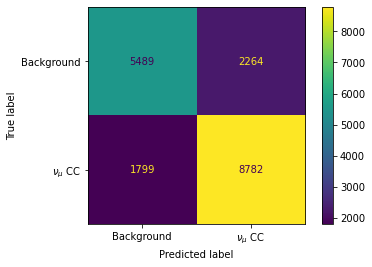

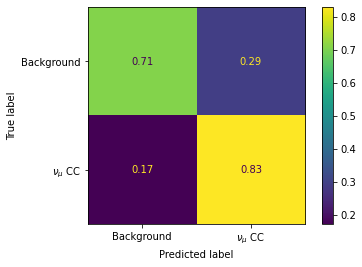

In [71]:
# For labelling your confusion matrix
ptype_no_mu_e = [r"Background", r"$\nu_{\mu}$ CC"]

# plot your confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ptype_no_mu_e)
disp.plot()
plt.show()

cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ptype_no_mu_e)
disp.plot()
plt.show()

In [72]:
X = MC_EXT_energy[features]

w = rf.predict(X)
background_indices = np.argwhere(w == 0)


In [73]:
new_bool = np.delete(boolean_array, background_indices)
len(new_bool)

98537

In [74]:
X = X.to_numpy()

In [75]:
len(X)

144211

In [76]:
signal_X = np.zeros((len(X[:,0]) - len(background_indices), 16))
for i in range(16):
    column = X[:,i]
    new_column = np.delete(column, background_indices)
    signal_X[:,i] = new_column

In [77]:
signal_X.reshape(16, len(X[:,0]) - len(background_indices))

array([[ 1.24478148e+02,  2.25284348e+02,  1.28639781e+00, ...,
         9.09694595e+01,  9.48170960e-01,  9.16999400e-01],
       [ 3.26737244e+02, -6.81160965e+01,  6.77579803e+01, ...,
         1.23974204e+00,  1.28314595e+02,  3.93024864e+01],
       [ 2.32096695e+02,  4.95077819e-01,  7.63285339e+02, ...,
        -7.27061391e-01,  3.47778229e+02, -9.59604645e+00],
       ...,
       [ 8.76964760e+00,  1.61664520e+02,  9.96068656e-01, ...,
         1.33907562e+02,  1.34448822e+02, -2.08364506e+01],
       [ 7.80266846e+02,  8.76329392e-01,  1.56681924e+00, ...,
         3.63751801e+02, -9.25009537e+00,  1.81683441e+02],
       [ 3.82500172e-01, -8.15879583e-01,  3.40837891e+02, ...,
        -8.04489441e+01,  1.66469666e+02,  4.61458564e-01]])

In [78]:
signal_X = pd.DataFrame(signal_X, columns = features)

In [79]:
new_bool_df = pd.DataFrame(new_bool, columns=['category'])
new_bool

array([1, 1, 1, ..., 0, 0, 0])

In [80]:
final = pd.concat([signal_X, new_bool_df], axis=1)

In [81]:
new_data_frame1 = data.copy(deep = True)
new_data_frame1 = new_data_frame1.drop('category', axis=1)


trk_energy_tot = new_data_frame1['trk_energy_tot']
     
trk_energy_tot_selection = (trk_energy_tot < 2)
new_data_frame = new_data_frame1[trk_energy_tot_selection]

In [82]:
p = rf.predict(new_data_frame)

In [83]:
background_indices1 = np.argwhere(p == 0)

In [84]:
ndf_np = new_data_frame.to_numpy()

In [85]:
new_ndf = np.zeros((len(ndf_np[:,0]) - len(background_indices1), 16))
for i in range(16):
    column = ndf_np[:,i]
    new_column = np.delete(column, background_indices1)
    new_ndf[:,i] = new_column

In [86]:
new_ndf.reshape(16, len(ndf_np[:,0]) - len(background_indices))

array([[ 1.77083498e+02,  1.74338699e+02,  5.76288626e-02, ...,
         1.17867171e+02,  1.58212219e+02,  3.46431971e-01],
       [ 4.95779634e-01,  5.08843750e+02,  6.51212549e+00, ...,
         3.04200709e-01,  5.57134827e+02, -8.37394333e+00],
       [ 1.95354141e+02,  9.99762595e-01,  9.44065750e-01, ...,
         1.26755424e+02,  9.73718941e-01,  9.02554631e-01],
       ...,
       [ 9.98521984e-01,  9.51962233e-01,  9.10547668e+02, ...,
         8.12179267e-01,  2.48845175e-01,  9.47093323e+02],
       [ 7.42467041e+01,  1.92877930e+02,  1.92770233e+02, ...,
         3.81167908e+01,  1.84588348e+02,  1.84459473e+02],
       [ 3.79201736e+01,  3.77915436e+02,  1.08421636e+00, ...,
        -3.52020149e+01,  7.83023224e+01,  8.19482923e-01]])

In [87]:
new_ndf = pd.DataFrame(new_ndf, columns = features)

In [88]:
o_weights = o_weights.to_numpy()
n_weights = np.delete(o_weights, background_indices)
n_weights = pd.DataFrame(n_weights)
n_weights.columns = ['weight']

In [89]:
n_weights['weight']

0        0.000002
1        0.000002
2        0.158957
3        0.158957
4        0.186696
           ...   
98532    0.257732
98533    0.257732
98534    0.257732
98535    0.257732
98536    0.257732
Name: weight, Length: 98537, dtype: float64

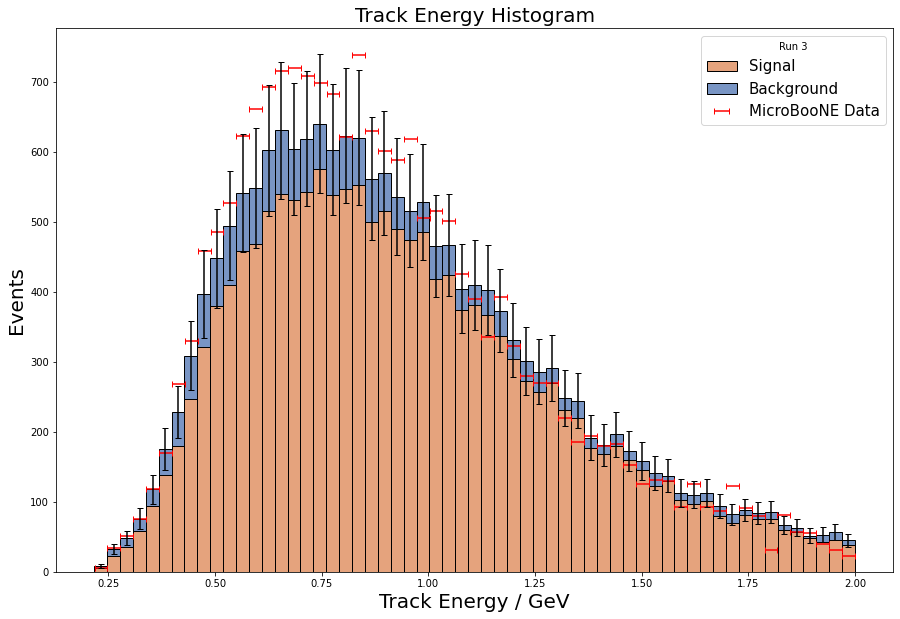

In [118]:
ndf_counts, ndf_bins = np.histogram(new_ndf['trk_energy_tot'], bins=59)
centers = (ndf_bins[:-1] + ndf_bins[1:]) / 2

counts2, bins2 = np.histogram(final['trk_energy_tot'], bins=59, weights=n_weights['weight'])
errors2 = counts2 * 0.15
se_counts2 = np.sqrt(counts2)

total_error2 = np.sqrt(se_counts2**2 + errors2**2)


plt.figure(figsize=(15,10))
j = sns.histplot(data=final, x='trk_energy_tot', multiple="stack", hue='category', palette = 'deep',bins=59, legend=False, weights=n_weights['weight'])
plt.errorbar(centers, ndf_counts, xerr=(ndf_bins[1]-ndf_bins[0]) / 2, fmt='none', color='r', capsize=3)
plt.errorbar(centers, counts2, yerr=total_error2, fmt='none', color='k', capsize=3)
plt.legend(title='Run 3',fontsize=15, loc='upper right', labels=[r"Signal", r"Background", "MicroBooNE Data"])
plt.xlabel('Track Energy / GeV', fontsize=20)
plt.ylabel('Events', fontsize=20)
plt.title('Track Energy Histogram', fontsize=20)


plt.savefig('histogram.png', dpi=1300)
plt.show(i)


In [91]:
N = len(final['trk_energy_tot'])
N_max = np.max(counts2)

H = np.log2(N/N_max) + 1
M = np.log2(N) / H
M

2.0068481568756256

In [92]:
new_purity = len(np.argwhere(new_bool == 1)) / len(new_bool)
new_eff = len(new_bool) / len(boolean_array)

print('New Purity:')
print(new_purity)
print('New Efficiency:')
print(new_eff)


New Purity:
0.8869460202766474
New Efficiency:
0.6832835220614238


# Chi square analysis for ML

In [93]:
# oscillation function
def dis(sin_sqr_2theta, del_m_sqr, energy):
    length=0.47
    
    arg = (1.27 * (del_m_sqr) * length) / energy
    
    probability = sin_sqr_2theta * (np.sin(arg)**2)
    return 1-probability


# muon disappearance application to reconstructed neutrino energy
sin_sqr_2theta = 0.9

del_m_sqr = 0.003

scaled_counts = []
final_errors = []

def scaling(paras, counts, errs):
    dis_fracs = dis(paras[0], paras[1], centers)
    new_counts = counts * dis_fracs
    new_error = errs * dis_fracs
    return new_counts, new_error

# chi squared function

def chi_sqr_func(paras, MC_counts, data_counts, err):

    pred_counts, new_errs = scaling(paras, MC_counts, err)

    chi = np.sum((pred_counts - data_counts)**2 / (new_errs**2))
    return chi

In [94]:
from scipy.optimize import fmin

def fit_function(para_i, MC_data, data_data, err):
    fit = fmin(chi_sqr_func, para_i, args=(MC_data, data_data, err), full_output=True, disp=1)
    paras = fit[0]
    min_chi = fit[1]
    return paras, min_chi

def meshing(array):

    mesh = np.empty((0, len(array)))
    for _ , iterator in enumerate(array):
        mesh = np.vstack((mesh, array))
    return mesh

In [95]:
final_paras2, min_chi2 = fit_function((sin_sqr_2theta, del_m_sqr), counts2, ndf_counts, total_error2)

final_theta2 = final_paras2[0]
final_del_m_sqr2 = final_paras2[1]

print(min_chi2)
print(final_paras2)



Optimization terminated successfully.
         Current function value: 59.012370
         Iterations: 42
         Function evaluations: 85
59.012370475077155
[1.07009181e+00 5.28332313e-09]


In [96]:
# theta_array = np.linspace(0.01, 0.37, 100)
theta_array = np.linspace(0.01, 0.37, 100)
del_m_sqr_array = np.linspace(1e-1, 1e2, 100)

theta_mesh, m_mesh = np.meshgrid(theta_array, del_m_sqr_array)

theta_mesh_list = theta_mesh.flatten()
m_mesh_list = m_mesh.flatten()

theta_m_list = np.column_stack((theta_mesh_list, m_mesh_list))

chi_square_list = np.empty((0, len(theta_m_list)))

for pair in theta_m_list:
    chi_square = chi_sqr_func(pair, counts2, ndf_counts, total_error2)
    chi_square_list = np.append(chi_square_list, chi_square)

chi_square_mesh = np.reshape(chi_square_list, (-1, len(theta_array)))

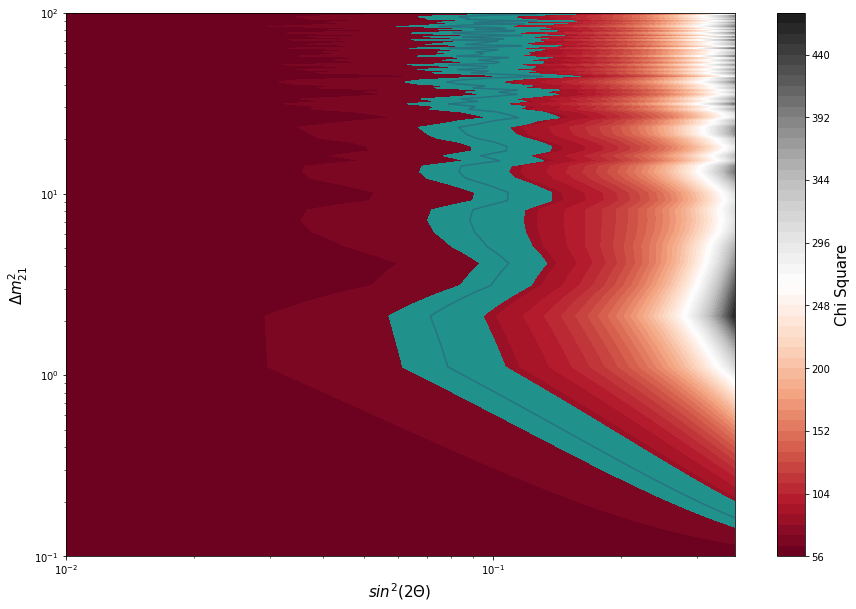

In [97]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)
cp = ax.contourf(theta_mesh, m_mesh, chi_square_mesh, levels=50, cmap='RdGy')

cp2 = ax.contourf(theta_mesh, m_mesh, chi_square_mesh, levels=[71.040, 84.733])
cp_test = ax.contour(theta_mesh, m_mesh, chi_square_mesh, levels=[71.040, 84.733], alpha=0)
cp3 = ax.contour(theta_mesh, m_mesh, chi_square_mesh, levels=[75.624], alpha=0.2)


cbar=fig.colorbar(cp)
cbar.ax.set_ylabel('Chi Square', fontsize=15)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$sin^2(2\Theta)$ ', fontsize=15)
plt.ylabel('$\Delta m_{21}^2$', fontsize=15)
plt.show()

In [98]:
a = 0.24

# sin_sqr_theta_mu_e = (a / (np.sqrt(1-a) + 1)) * (1 - np.sqrt(1-theta_array))
sin_sqr_theta_mu_e = (a / 2) * (1 - np.sqrt(1-theta_array))

theta_mesh_2, m_mesh_2 = np.meshgrid(sin_sqr_theta_mu_e, del_m_sqr_array)

theta_mesh_list_2 = theta_mesh.flatten()
m_mesh_list_2 = m_mesh.flatten()

theta_m_list_2 = np.column_stack((theta_mesh_list_2, m_mesh_list_2))

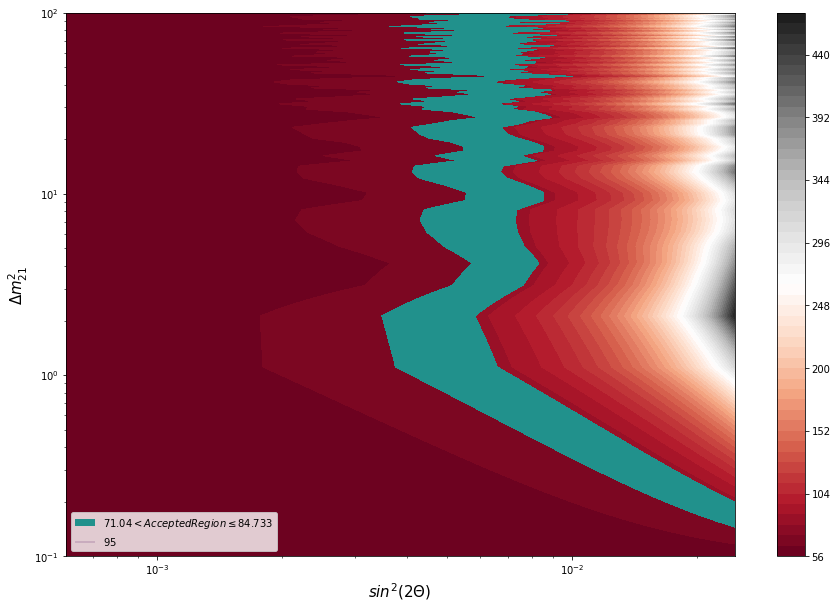

In [99]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)

cp_new = ax.contourf(theta_mesh_2, m_mesh_2, chi_square_mesh, levels=50, cmap='RdGy')
cp2_new = ax.contourf(theta_mesh_2, m_mesh_2, chi_square_mesh, levels=[71.040, 84.733])
# cp_test_new = ax.contour(theta_mesh_2, m_mesh_2, chi_square_mesh, levels=[71.040, 84.733], alpha=0)
# cp3_new = ax.contour(theta_mesh_2, m_mesh_2, chi_square_mesh, levels=[75.624], alpha=0.2)

left = ax.contour(theta_mesh_2, m_mesh_2, chi_square_mesh, levels=[71.040], alpha=0)
right = ax.contour(theta_mesh_2, m_mesh_2, chi_square_mesh, levels=[84.733], alpha=0)

h2, l2 = cp2_new.legend_elements('Accepted Region')
h3, l3 = cp3_new.legend_elements('95%')
ax.legend(h2+h3, l2+l3, loc='lower left')
cbar = fig.colorbar(cp_new)

cbar=fig.colorbar(cp)
cbar.ax.set_ylabel('Chi Square', fontsize=15)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$sin^2(2\Theta)$ ', fontsize=15)
plt.ylabel('$\Delta m_{21}^2$', fontsize=15)
plt.show()

In [100]:
accepted_values = cp2_new.allsegs[0][0]
left_values = left.allsegs[0][0]
right_values = right.allsegs[0][0]
middle_values = cp3_new.allsegs[0][0]

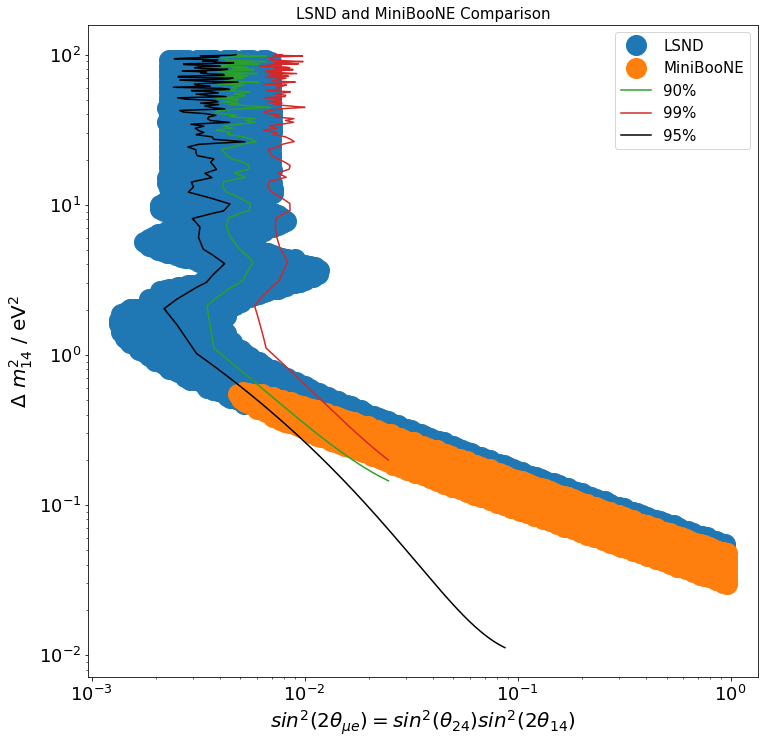

In [101]:
# Load data
LSND_data = pd.read_csv('./data/DataSet_LSND.csv').to_numpy()
MiniBooNE_data = pd.read_csv('./data/DataSet_MiniBooNE.csv').to_numpy()


plt.figure(figsize=(12,12))
# Plot data
plt.title('LSND and MiniBooNE Comparison', fontsize=15)
plt.plot(LSND_data[:,0],LSND_data[:,1],'o',markersize=20,label='LSND')
plt.plot(MiniBooNE_data[:,0],MiniBooNE_data[:,1],'o', markersize=20, label='MiniBooNE')
plt.plot(left_values[:,0], left_values[:,1], '-', label='90%')
plt.plot(right_values[:,0], right_values[:,1], '-', label='99%')
plt.plot(middle_values[:,0], middle_values[:,1], '-', label='95%', c='k')
plt.legend(prop={'size': 15})

plt.xlabel(r'$sin^2(2\theta_{\mu e})=sin^2(\theta_{24})sin^2(2\theta_{14})$',fontsize=20)
plt.ylabel(r'$\Delta$ $m_{14}^2$ / eV$^2$',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.yscale('log')
plt.xscale('log')
plt.show()

# Entropy

In [102]:
# Adjust data shape
features = ['_closestNuCosmicDist', 'trk_len_v', 'trk_distance_v', 'topological_score', 'trk_sce_end_z_v', 'trk_sce_end_y_v', 'trk_sce_end_x_v', 'trk_score_v', 'trk_llr_pid_score_v', 'trk_sce_start_z_v', 'trk_sce_start_y_v', 'trk_sce_start_x_v', 'reco_nu_vtx_sce_x', 'reco_nu_vtx_sce_y', 'reco_nu_vtx_sce_z', 'trk_energy_tot']
output = ['category']

# Setup new database, NEED MORE VALUES
MC_EXT_ML = MC_EXT.copy(deep = True)
MC_EXT_ML = MC_EXT.sample(int(len(MC_EXT)/10))

trk_energy_tot = MC_EXT_ML['trk_energy_tot']
     
# trk_energy_tot_selection = (trk_energy_tot > 0.4) & (trk_energy_tot < 2)
trk_energy_tot_selection = (trk_energy_tot < 2)

MC_EXT_energy = MC_EXT_ML[trk_energy_tot_selection]


In [103]:
X = MC_EXT_energy[features]
y = np.array(MC_EXT_energy['category'])


# X = MC_EXT_ML[features]
# y = np.array(MC_EXT_ML['category'])

boolean_array = []
for category in y:
    if category != 21:
        boolean = 0
    else:
        boolean = 1
    boolean_array.append(boolean)
boolean_array = np.array(boolean_array)

full_length = len(MC_EXT_energy)

# full_length = len(MC_EXT_ML)

x_train, x_test, y_train, y_test = train_test_split(X, boolean_array, test_size=0.2, train_size=0.8, random_state=1) # 80/20 training/test split

In [104]:
# Produce randomforest classifier model and fit to training data
# Keep the random_state=1 in your arguments
rf = RandomForestClassifier(n_estimators=1000, max_depth=8, random_state=1, criterion='gini')

# Fitting takes the input and "truth" data for classification purposes
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=1000, random_state=1)

In [105]:
# Produce predictions for the classification of your training dataset using your model:
y_pred = rf.predict(x_train)

# plot the accuracies of said predictions
print("Accuracy on training dataset:",metrics.accuracy_score(y_train, y_pred))
rf_acc_train = metrics.accuracy_score(y_train, y_pred)
y_pred = rf.predict(x_test)
print("Accuracy on testing dataset:",metrics.accuracy_score(y_test, y_pred))
rf_acc_test = metrics.accuracy_score(y_test, y_pred)

Accuracy on training dataset: 0.8546117769671704
Accuracy on testing dataset: 0.8218131295588746


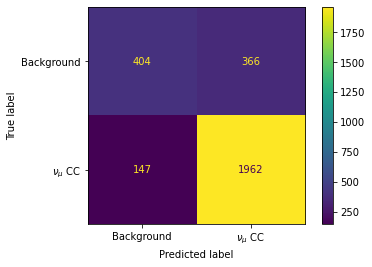

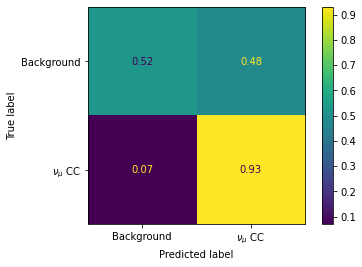

In [106]:
# For labelling your confusion matrix
ptype_no_mu_e = [r"Background", r"$\nu_{\mu}$ CC"]

# plot your confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ptype_no_mu_e)
disp.plot()
plt.show()

cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ptype_no_mu_e)
disp.plot()
plt.show()

In [107]:
y_predict = rf.predict(X)
y_predict_bool = []
for val in y_predict:
    if val == 1:
        temp = True
    else:
        temp = False
    y_predict_bool.append(temp)
y_predict_bool = np.array(y_predict_bool)
y_predict_bool = pd.Series(y_predict_bool, name='Category')

In [108]:
MC_EXT_energy.reset_index(drop=True, inplace=True)
MC_EXT_5 = MC_EXT_energy[y_predict_bool]

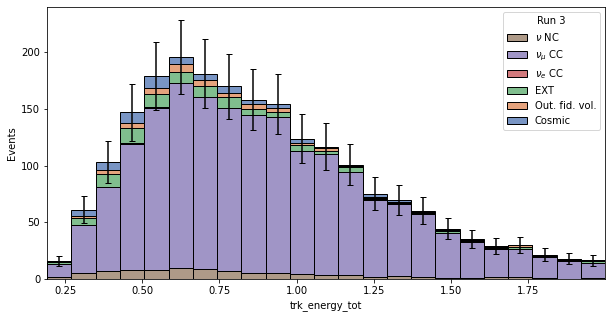

In [109]:
BIN = 23
index = 'trk_energy_tot'

counts, bins = np.histogram(MC_EXT_5['trk_energy_tot'], bins=23, weights=MC_EXT_5['weight'])
errors = counts * 0.15
se_counts = np.sqrt(counts)

total_error = np.sqrt(se_counts**2 + errors**2)

#data_counts, data_bins = np.histogram(data_frame['trk_energy_tot'], bins=23)

plt.figure(figsize=(10,5))
i = sns.histplot(data=MC_EXT_5, x=index, multiple="stack", hue="category", palette = 'deep', weights = MC_EXT_5['weight'], bins = BIN, legend = False)
i.set(xlabel=index, ylabel = "Events")

centers = (bins[:-1] + bins[1:]) / 2
plt.errorbar(centers, counts, yerr=total_error, fmt='none', color='k', capsize=3)
#plt.errorbar(centers, data_counts, xerr=(data_bins[1]-data_bins[0]) / 2, fmt='none', color='r', capsize=3)

#plt.yscale('log')
plt.xlim([np.min(MC_EXT_5[index]), np.max(MC_EXT_5[index])])
plt.legend(title='Run 3',fontsize=10, loc='upper right', labels=[r"$\nu$ NC", r"$\nu_{\mu}$ CC", r"$\nu_e$ CC", r"EXT", r"Out. fid. vol.", r"Cosmic"])
plt.show(i)

In [110]:
temp_frame = MC_EXT_5.copy(deep=True)
temp_frame.reset_index(drop=True, inplace=True)
temp_frame_new = temp_frame[temp_frame.category == 21].index
signal_no = len(temp_frame_new)
surviving_frames = len(temp_frame)

eff = surviving_frames / full_length
pur = signal_no / surviving_frames 

In [111]:
print("Efficiency = ")
print(eff)

print("Purity = ")
print(pur)

Efficiency = 
0.8067810741332592
Purity = 
0.8552359627971065
